1. 제약조건 정리    
    1) 가중치 합은 1
    2) 한국 주식 투자비율 20% 이상
2. 환헷지 환노출 포트폴리오 따로 투자
 

# 데이터 가져오기 및 기초 함수 정의

## 기본 함수 및 데이터 불러오기

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize
import plotly.figure_factory as ff
import plotly.express as px
from ipywidgets import VBox, HBox, Output, Button, IntText, Label, FloatText
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
import matplotlib.animation as animation
import scipy.optimize as sco
from scipy.stats import linregress
from matplotlib import font_manager, rc
from scipy.stats import t, laplace
import statsmodels.api as sm

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

target_return = pd.read_excel('C:/Users/qwe54/OneDrive/바탕 화면/자산배분/목표수익률.xlsx', index_col=0)
data = pd.read_csv("all_final_returns.csv", index_col=0)
rf = pd.read_csv("한국 1년 채권수익률 과거 데이터.csv", index_col=0)
rf = rf/100
data

KOSPI 200_return  S&P 500_return  US_BOND_return  \
Symbol Name                                                     
2014-03-31                NaN             NaN             NaN   
2014-04-01           0.003254        0.007045       -0.000960   
2014-04-02           0.002896        0.002853       -0.001567   
2014-04-03          -0.001386       -0.001126        0.000354   
2014-04-04           0.000501       -0.012537        0.002303   
...                       ...             ...             ...   
2024-04-22           0.012224        0.008731        0.000140   
2024-04-23          -0.002550        0.011965        0.000884   
2024-04-24           0.021406        0.000213       -0.001744   
2024-04-25          -0.019499       -0.004576       -0.002492   
2024-04-26           0.012650        0.010209        0.001588   

             KOR_BOND_return  S&P 500_cum  KSPI 200_cum  US_BOND_cum  \
Symbol Name                                                            
2014-03-31               NaN     1.000000      1.000000     1.000000   
2014-04-01         -0.000033     1.007045      1.003254     0.999040   
2014-04-02         -0.000198     1.009918      1.006160     0.997474   
2014-04-03          0.000066     1.008781      1.004765     0.997828   
2014-04-04          0.000198     0.996133      1.005269     1.000126   
...                      ...          ...           ...          ...   
2024-04-22         -0.000792     2.676131      1.382705     1.085135   
2024-04-23          0.000694     2.708150      1.379179     1.086095   
2024-04-24         -0.000429     2.708727      1.408702     1.084200   
2024-04-25         -0.000859     2.696330      1.381233     1.081498   
2024-04-26          0.001091     2.723857      1.398706     1.083215   

             KOR_BOND_cum  snp_exposure_return(cum)  snp_hedged_return(cum)  \
Symbol Name                                                                   
2014-03-31       1.000000                  1.000000                1.000031   
2014-04-01       0.999967                  1.004501                1.007075   
2014-04-02       0.999769                  1.002075                1.009948   
2014-04-03       0.999835                  0.997643                1.008810   
2014-04-04       1.000033                  0.986161                0.996165   
...                   ...                       ...                     ...   
2024-04-22       1.229600                  3.467853                2.676033   
2024-04-23       1.230453                  3.498196                2.708049   
2024-04-24       1.229925                  3.492098                2.708624   
2024-04-25       1.228868                  3.456187                2.696228   
2024-04-26       1.230209                  3.508292                2.723757   

             us_bond_exposure_return(cum)  us_bond_hedged_return(cum)  
Symbol Name                                                            
2014-03-31                       1.000000                    1.000031  
2014-04-01                       0.996517                    0.999070  
2014-04-02                       0.989728                    0.997504  
2014-04-03                       0.986812                    0.997858  
2014-04-04                       0.990114                    1.000159  
...                                   ...                         ...  
2024-04-22                       1.406167                    1.085095  
2024-04-23                       1.402940                    1.086054  
2024-04-24                       1.397754                    1.084159  
2024-04-25                       1.386277                    1.081457  
2024-04-26                       1.395167                    1.083176  

[2389 rows x 12 columns]

In [32]:
data = data.pct_change()
data = data.iloc[1:]
data

KOSPI 200_return  S&P 500_return  US_BOND_return  \
Symbol Name                                                     
2014-04-01                NaN             NaN             NaN   
2014-04-02          -0.110039       -0.594969        0.633146   
2014-04-03          -1.478614       -1.394784       -1.226161   
2014-04-04          -1.361612       10.129908        5.497697   
2014-04-07           2.229151       -0.142544       -0.517595   
...                       ...             ...             ...   
2024-04-22          -1.677348       -1.996883       -0.882493   
2024-04-23          -1.208587        0.370327        5.332449   
2024-04-24          -9.395032       -0.982198       -2.971940   
2024-04-25          -1.910947      -22.486164        0.429159   
2024-04-26          -1.648758       -3.230804       -1.637102   

             KOR_BOND_return  S&P 500_cum  KSPI 200_cum  US_BOND_cum  \
Symbol Name                                                            
2014-04-01               NaN     0.007045      0.003254    -0.000960   
2014-04-02          5.098238     0.002853      0.002896    -0.001567   
2014-04-03         -1.331255    -0.001126     -0.001386     0.000354   
2014-04-04          2.019219    -0.012537      0.000501     0.002303   
2014-04-07          1.996190    -0.010750      0.001619     0.001111   
...                      ...          ...           ...          ...   
2024-04-22         -0.332541     0.008731      0.012224     0.000140   
2024-04-23         -1.875694     0.011965     -0.002550     0.000884   
2024-04-24         -1.618120     0.000213      0.021406    -0.001744   
2024-04-25          1.003278    -0.004576     -0.019499    -0.002492   
2024-04-26         -2.269811     0.010209      0.012650     0.001588   

             KOR_BOND_cum  snp_exposure_return(cum)  snp_hedged_return(cum)  \
Symbol Name                                                                   
2014-04-01      -0.000033                  0.004501                0.007044   
2014-04-02      -0.000198                 -0.002414                0.002852   
2014-04-03       0.000066                 -0.004423               -0.001126   
2014-04-04       0.000198                 -0.011510               -0.012535   
2014-04-07       0.000595                 -0.012620               -0.010751   
...                   ...                       ...                     ...   
2024-04-22      -0.000792                  0.015403                0.008734   
2024-04-23       0.000694                  0.008750                0.011964   
2024-04-24      -0.000429                 -0.001743                0.000212   
2024-04-25      -0.000859                 -0.010284               -0.004576   
2024-04-26       0.001091                  0.015076                0.010210   

             us_bond_exposure_return(cum)  us_bond_hedged_return(cum)  
Symbol Name                                                            
2014-04-01                      -0.003483                   -0.000960  
2014-04-02                      -0.006812                   -0.001568  
2014-04-03                      -0.002947                    0.000355  
2014-04-04                       0.003346                    0.002306  
2014-04-07                      -0.000781                    0.001111  
...                                   ...                         ...  
2024-04-22                       0.006754                    0.000143  
2024-04-23                      -0.002295                    0.000884  
2024-04-24                      -0.003696                   -0.001745  
2024-04-25                      -0.008212                   -0.002492  
2024-04-26                       0.006413                    0.001589  

[2388 rows x 12 columns]

In [33]:
df = data[['KSPI 200_cum', 'snp_exposure_return(cum)', 'us_bond_exposure_return(cum)', 'KOR_BOND_cum']]
df.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
df

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
Symbol Name                                                                   
2014-04-01           0.003254        0.004501       -0.003483        -0.000033
2014-04-02           0.002896       -0.002414       -0.006812        -0.000198
2014-04-03          -0.001386       -0.004423       -0.002947         0.000066
2014-04-04           0.000501       -0.011510        0.003346         0.000198
2014-04-07           0.001619       -0.012620       -0.000781         0.000595
...                       ...             ...             ...              ...
2024-04-22           0.012224        0.015403        0.006754        -0.000792
2024-04-23          -0.002550        0.008750       -0.002295         0.000694
2024-04-24           0.021406       -0.001743       -0.003696        -0.000429
2024-04-25          -0.019499       -0.010284       -0.008212        -0.000859
2024-04-26           0.012650        0.015076        0.006413         0.001091

[2388 rows x 4 columns]

In [34]:
data_0 = df.loc["2015-02-02":"2016-02-01"]
data_1 = df.loc["2016-02-01":"2017-02-01"]
data_2 = df.loc["2017-02-01":"2018-02-01"]
data_3 = df.loc["2018-02-01":"2019-02-01"]
data_4 = df.loc["2019-02-01":"2020-02-01"]
data_5 = df.loc["2020-02-01":"2021-02-01"]
data_6 = df.loc["2021-02-01":"2022-02-01"]
data_7 = df.loc["2022-02-01":"2023-02-01"]
data_8 = df.loc["2023-02-01":"2024-02-01"]

In [35]:
target_return = target_return.iloc[2:]
target_return

목표수익률
2015  0.035149
2016  0.039213
2017  0.051017
2018  0.043835
2019  0.026296
2020 -0.001756
2021  0.068055
2022  0.077038
2023  0.049539

In [10]:
rf

한국 1년 채권 수익률
날짜                
2015       0.02011
2016       0.01460
2017       0.01435
2018       0.01761
2019       0.01765
2020       0.01106
2021       0.00619
2022       0.01496
2023       0.03690

In [11]:
# 포트폴리오 리턴과 변동성 계산 함수
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(252)
    return std, returns

In [12]:
# 초기 가중치 설정
initial_weights = np.array([1./len(df.columns) for asset in range(len(df.columns))])
# 가중치 범위 (0과 1 사이)
bounds = tuple((0, 1) for asset in range(len(df.columns)))
# 최적화 제약 조건 (모든 가중치 합은 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 가중치 합이 1
             

## 2015

In [153]:
rf.iloc[0]

한국 1년 채권 수익률    0.02011
Name: 2015, dtype: float64

In [154]:
risk_free_rate=0.02011

In [155]:
# 목적 함수 (최소화할 함수: 샤프 비율의 음수값) - 목적함수 minimize
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.02011):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [156]:
data_0.mean()

KOSPI 200_return   -0.000241
S&P 500_return      0.000363
US_BOND_return      0.000451
KOR_BOND_return     0.000133
dtype: float64

In [157]:
kospi = data_0['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_0['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_0['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_0['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

In [158]:
def gene_dist_kospi(x):
        t_pdf = t.pdf(x, df=3, loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))  # t-분포의 자유도(kospi)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))
        probx = (0.5*t_pdf) + (0.5* laplace_pdf) 
        return probx

In [159]:
def gene_dist_snp(x):
        t_pdf = t.pdf(x, df=2.5, loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))  # t-분포의 자유도(snp)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))
        probx = (0.7*t_pdf) + (0.3* laplace_pdf) 
        return probx

In [160]:
def gene_dist_us(x):
        t_pdf = t.pdf(x, df=3, loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))  # t-분포의 자유도(us_bond)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))
        probx = (0.2*t_pdf) + (0.8* laplace_pdf) 
        return probx

In [161]:
def gene_dist_kr(x):
        t_pdf = t.pdf(x, df=2, loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))  # t-분포의 자유도(kr_bond)는 임의로 설정됨
        laplace_pdf = laplace.pdf(x, loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))
        probx = (0.5*t_pdf) + (0.5* laplace_pdf) 
        return probx

In [162]:
def target_dist_kospi(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(kospi['KOSPI 200_return'])
    max_return = max(kospi['KOSPI 200_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(kospi['KOSPI 200_return'], bins=bins)
    hist_ratio = hist / len(kospi['KOSPI 200_return'])
    return hist_ratio[bin_index - 1]

In [163]:
def target_dist_snp(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(snp['S&P 500_return'])
    max_return = max(snp['S&P 500_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(snp['S&P 500_return'], bins=bins)
    hist_ratio = hist / len(snp['S&P 500_return'])
    return hist_ratio[bin_index - 1]

In [164]:
def target_dist_us(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(us_bond['US_BOND_return'])
    max_return = max(us_bond['US_BOND_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(us_bond['US_BOND_return'], bins=bins)
    hist_ratio = hist / len(us_bond['US_BOND_return'])
    return hist_ratio[bin_index - 1]

In [165]:
def target_dist_kr(x):
    # 데이터의 최솟값과 최댓값 계산
    min_return = min(kr_bond['KOR_BOND_return'])
    max_return = max(kr_bond['KOR_BOND_return'])
    
    # 최솟값과 최댓값 사이를 10000개의 구간으로 나누기
    bins = np.linspace(min_return, max_return, 1000)
    
    # x가 속한 구간의 인덱스를 찾기
    bin_index = np.searchsorted(bins, x)
    
    # x가 속한 구간의 인덱스를 범위 내로 조정
    if bin_index == 0:
        bin_index = 1
    elif bin_index == len(bins):
        bin_index = len(bins) - 1
    
    # x가 속한 구간의 인덱스로 hist_ratio 값을 찾아서 반환
    hist, _ = np.histogram(kr_bond['KOR_BOND_return'], bins=bins)
    hist_ratio = hist / len(kr_bond['KOR_BOND_return'])
    return hist_ratio[bin_index - 1]

In [166]:
def run_mcmc_kospi(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(kospi['KOSPI 200_return'])
        max_return = max(kospi['KOSPI 200_return'])

        while True:
            sample_t = t.rvs(df=3, loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))
            sample_la = laplace.rvs(loc=np.mean(kospi['KOSPI 200_return']), scale=np.std(kospi['KOSPI 200_return']))
            proposal = (0.5 * sample_t) + (0.5 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(kospi['KOSPI 200_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list


In [23]:
x0 = np.mean(snp['S&P 500_return'])
x_vals = np.linspace(min(snp['S&P 500_return']), max(snp['S&P 500_return']), 10000)

def run_mcmc_snp(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(snp['S&P 500_return'])
        max_return = max(snp['S&P 500_return'])

        while True:
            sample_t = t.rvs(df=2.5, loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))
            sample_la = laplace.rvs(loc=np.mean(snp['S&P 500_return']), scale=np.std(snp['S&P 500_return']))
            proposal = (0.7 * sample_t) + (0.3 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(snp['S&P 500_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list


In [24]:
x0 = np.mean(us_bond['US_BOND_return'])
x_vals = np.linspace(min(us_bond['US_BOND_return']), max(us_bond['US_BOND_return']), 10000)

def run_mcmc_us(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(us_bond['US_BOND_return'])
        max_return = max(us_bond['US_BOND_return'])

        while True:
            sample_t = t.rvs(df=3, loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))
            sample_la = laplace.rvs(loc=np.mean(us_bond['US_BOND_return']), scale=np.std(us_bond['US_BOND_return']))
            proposal = (0.2 * sample_t) + (0.8 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(us_bond['US_BOND_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list

In [25]:
x0 = np.mean(kr_bond['KOR_BOND_return'])
x_vals = np.linspace(min(kr_bond['KOR_BOND_return']), max(kr_bond['KOR_BOND_return']), 10000)

def run_mcmc_kr(n_iter):

    sample_list = []
    num = 0
    acc_num = 0

    def MHstep(x0):

        # 후보생성함수에서 프로포절 생성
        # t-분포의 자유도(all_returns)는 임의로 설정됨
        min_return = min(kr_bond['KOR_BOND_return'])
        max_return = max(kr_bond['KOR_BOND_return'])

        while True:
            sample_t = t.rvs(df=2, loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))
            sample_la = laplace.rvs(loc=np.mean(kr_bond['KOR_BOND_return']), scale=np.std(kr_bond['KOR_BOND_return']))
            proposal = (0.5 * sample_t) + (0.5 * sample_la)

            # proposal이 최솟값과 최댓값 사이에 있으면 루프를 빠져나옴
            if min_return <= proposal <= max_return:
                break


        # M-H ratio
        rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
        MH_ratio = min(rat, 1) # acceptance probability
        u = np.random.rand() # uniform random number
        if u <= MH_ratio: # if accepted
            x1 = proposal # new point is the candidate
            a = 1 # note the acceptance
        else: # if rejected
            x1 = x0 # new point is the same as the old one
            a = 0 # note the rejection
        return x1, a

    x0 = np.mean(kr_bond['KOR_BOND_return'])

    for i in range(n_iter):
        sample, accept = MHstep(x0)
        sample_list.append(sample)
        x0 = sample
        
        if accept == 1:
            acc_num += 1
            num += 1
        else:
            num += 1   

    print("수락된 프로포절의 수:", acc_num, "제안된 프로포절 수:", num)
    return sample_list

In [26]:
def resampled_efficiency_optimization(n_iterations=10000):
    results = np.zeros((n_iterations, len(df.columns)))
    results_point = np.zeros((3, n_iterations))
    weights_record = []
    for i in range(n_iterations):
        # 표본 추출된 수익률과 공분산 행렬

        sample_kospi = run_mcmc_kospi(1000)
        sample_kospi = pd.DataFrame(sample_kospi, columns=['kospi'])
        sample_snp = run_mcmc_snp(1000)
        sample_snp = pd.DataFrame(sample_snp, columns=['snp'])
        sample_us = run_mcmc_us(1000)
        sample_us = pd.DataFrame(sample_us, columns=['us'])
        sample_kr = run_mcmc_kr(1000)
        sample_kr = pd.DataFrame(sample_kr, columns=['kr'])

        sampled_returns =  pd.concat([sample_kospi, sample_snp, sample_us, sample_kr], axis=1 )
        sampled_mean_returns = sampled_returns.mean(axis=0)
        sampled_cov_matrix = np.cov(sampled_returns, rowvar=False)
        
        # 최적화
        opt_results = minimize(neg_sharpe_ratio, initial_weights, args=(sampled_mean_returns, sampled_cov_matrix),
                               method='SLSQP', bounds=bounds, constraints=constraints)
        
        results[i, :] = opt_results.x
        weights_record.append(results[i, :])
        portfolio_std_dev, portfolio_return = portfolio_performance(results[i, :], sampled_mean_returns, sampled_cov_matrix)
        results_point[0,i] = portfolio_std_dev
        results_point[1,i] = portfolio_return
        results_point[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results.mean(axis=0), weights_record, results_point

In [27]:
def efficient_frontier(results_point, target, weights_record):
    ret = pd.DataFrame(results_point)
    weights_record = pd.DataFrame(weights_record)
    max_sharpe_port = []
    selected_indexes = []  # 선택된 열에 해당하는 weight_record의 인덱스를 저장할 리스트
    
    for idx in range(len(target)-1):  # 마지막 인덱스는 제외
        i, next_i = target[idx], target[idx+1]
        da = ret.loc[:, (ret.iloc[0] >= i) & (ret.iloc[0] <= next_i)]
        
        # 만약 해당 구간에 데이터가 없다면 처리
        if da.empty:
            continue
        
        max_sharpe_column = da.iloc[1].idxmax()  # 1행에서 가장 높은 값을 가지는 열의 인덱스 가져오기
        max_sharpe_port.append(da[max_sharpe_column])  # 해당 열을 max_sharpe_port에 추가
        selected_indexes.append(max_sharpe_column)  # 해당 열에 해당하는 weight_record의 인덱스 추가
    
    # weight_record에서 선택된 인덱스에 해당하는 데이터 추출하여 반환
    selected_weights = weights_record.loc[selected_indexes]
    
    return max_sharpe_port, selected_weights

수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 81 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2766801409.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 48 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 183 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 181 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 80 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 173 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 203 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 87 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


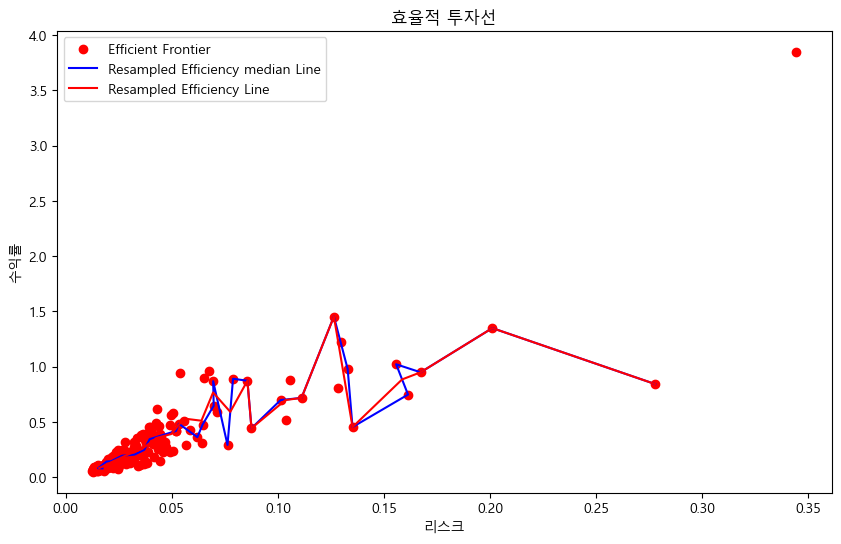

In [28]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
resampled_weight = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    resampled_weight = pd.concat([resampled_weight, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [29]:
median_xy_2015 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2015.columns = ['x', 'y']
median_xy_2015

x         y
0   0.017349  0.080084
1   0.015295  0.081387
2   0.019240  0.142080
3   0.021327  0.144073
4   0.026642  0.194645
5   0.032468  0.204971
6   0.037028  0.247800
7   0.039581  0.344485
8   0.051988  0.418589
9   0.053358  0.484113
10  0.062076  0.362397
11  0.064503  0.475128
12  0.069772  0.646812
13  0.069514  0.868667
14  0.076284  0.291956
15  0.078877  0.890839
16  0.085657  0.872903
17  0.087584  0.443112
18  0.101312  0.698172
19  0.111155  0.717669
20  0.126421  1.453501
21  0.132908  0.979447
22  0.135204  0.453795
23  0.161361  0.747745
24  0.155768  1.021847
25  0.167297  0.949262
26  0.201097  1.349101
27  0.277984  0.841864

In [30]:
weight_2015 = resampled_weight
weight_2015

0             1             2             3
0   9.516078e-15  7.070511e-14  1.785811e-01  8.214189e-01
1   2.229514e-02  1.973470e-02  4.046689e-02  9.175033e-01
2   2.670661e-13  3.611795e-02  6.626181e-02  8.976202e-01
3   0.000000e+00  4.158451e-02  3.118239e-02  9.272331e-01
4   1.192238e-02  6.301532e-02  1.156028e-01  8.094595e-01
5   8.717506e-02  5.279168e-02  2.532529e-01  6.067804e-01
6   1.639412e-02  7.913223e-02  1.615470e-01  7.429266e-01
7   0.000000e+00  9.113059e-02  1.661322e-02  8.922562e-01
8   7.836614e-03  1.313165e-01  0.000000e+00  8.608468e-01
9   1.726126e-13  1.400761e-01  0.000000e+00  8.599239e-01
10  3.071158e-01  1.261314e-01  1.371427e-02  5.530386e-01
11  1.192622e-17  1.651625e-01  0.000000e+00  8.348375e-01
12  0.000000e+00  1.983757e-01  4.388081e-01  3.628162e-01
13  1.003892e-01  1.984834e-01  8.979505e-02  6.113324e-01
14  4.124028e-01  3.284699e-15  5.875972e-01  0.000000e+00
15  4.262938e-03  2.239137e-01  4.263379e-01  3.454855e-01
16  1.217776e-15  2.600551e-01  1.408824e-01  5.990625e-01
17  1.756333e-01  2.134522e-01  9.486769e-19  6.109145e-01
18  7.125243e-03  2.678336e-01  3.644127e-01  3.606284e-01
19  2.679997e-16  2.889425e-01  4.714902e-02  6.639085e-01
20  5.429684e-18  3.648997e-01  1.126973e-01  5.224029e-01
21  4.235239e-01  2.321875e-01  3.209494e-01  2.333926e-02
22  0.000000e+00  3.579252e-01  0.000000e+00  6.420748e-01
23  0.000000e+00  4.022069e-01  5.977931e-01  0.000000e+00
24  5.539107e-15  4.634060e-01  1.338593e-16  5.365940e-01
25  0.000000e+00  5.068049e-01  4.931951e-01  1.297199e-16
26  4.440892e-16  6.966534e-01  0.000000e+00  3.033466e-01
27  5.110387e-16  7.513928e-01  2.486072e-01  1.074806e-16

## 2016

In [31]:
rf.iloc[1]

한국 1년 채권 수익률    0.0146
Name: 2016, dtype: float64

In [32]:
# 목적 함수 (최소화할 함수: 샤프 비율의 음수값) - 목적함수 minimize
risk_free_rate = 0.01460
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01460):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [33]:
kospi = data_1['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_1['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_1['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_1['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\1394277956.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 63 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 73 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 70 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 51 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 198 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 181 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 68 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 78 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 78 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 43 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 81 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 86 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 92 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 82 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 80 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 78 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


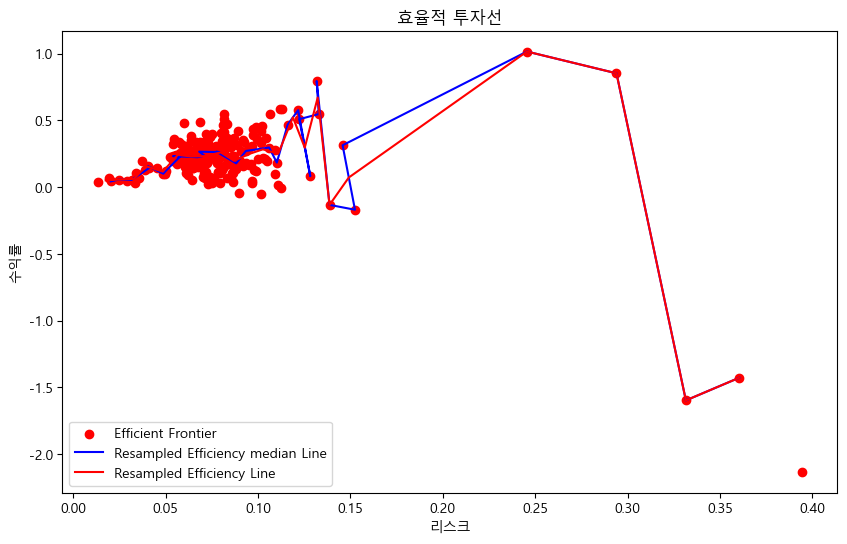

In [34]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2016 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2016 = pd.concat([weight_2016, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [35]:
median_xy_2016 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2016.columns = ['x', 'y']
median_xy_2016

x         y
0   0.020214  0.042808
1   0.024515  0.056139
2   0.031511  0.054281
3   0.040957  0.142147
4   0.040292  0.157252
5   0.048676  0.100380
6   0.050137  0.123584
7   0.057922  0.230889
8   0.053928  0.232003
9   0.067246  0.223738
10  0.070906  0.235375
11  0.068081  0.265304
12  0.079179  0.262049
13  0.077364  0.265970
14  0.088138  0.177845
15  0.093400  0.270724
16  0.105966  0.296211
17  0.110126  0.183676
18  0.116014  0.468000
19  0.121671  0.576531
20  0.128239  0.081869
21  0.122275  0.508664
22  0.132822  0.547151
23  0.131701  0.794917
24  0.138663 -0.133435
25  0.152442 -0.169866
26  0.145743  0.313203
27  0.245547  1.015734
28  0.294019  0.852548
29  0.331589 -1.598676
30  0.360599 -1.428115

## 2017

In [36]:
risk_free_rate = 0.01435
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01435):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [37]:
kospi = data_2['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_2['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_2['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_2['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 528 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 499 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\1428722453.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 528 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 517 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 231 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 537 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 469 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 530 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 533 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 524 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 534 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 522 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 532 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 530 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 506 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 531 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 517 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 515 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 517 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 541 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 518 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 550 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 521 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 531 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 526 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 534 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 521 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 536 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 529 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 535 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 516 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 535 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 181 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 528 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 529 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 537 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 532 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 529 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 516 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 516 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 517 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 553 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 535 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 502 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 488 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 183 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 485 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 535 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 528 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 535 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 509 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 486 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 523 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 493 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 520 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 482 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 515 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 521 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 492 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 527 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 500 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 507 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 537 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 512 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 505 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 496 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 498 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 519 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 510 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 513 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 522 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 514 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 543 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 491 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 525 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 538 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 504 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 531 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 518 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 508 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 487 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 509 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 515 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 527 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 207 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 495 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 497 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 511 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 501 제안된 프로포절 수: 1000


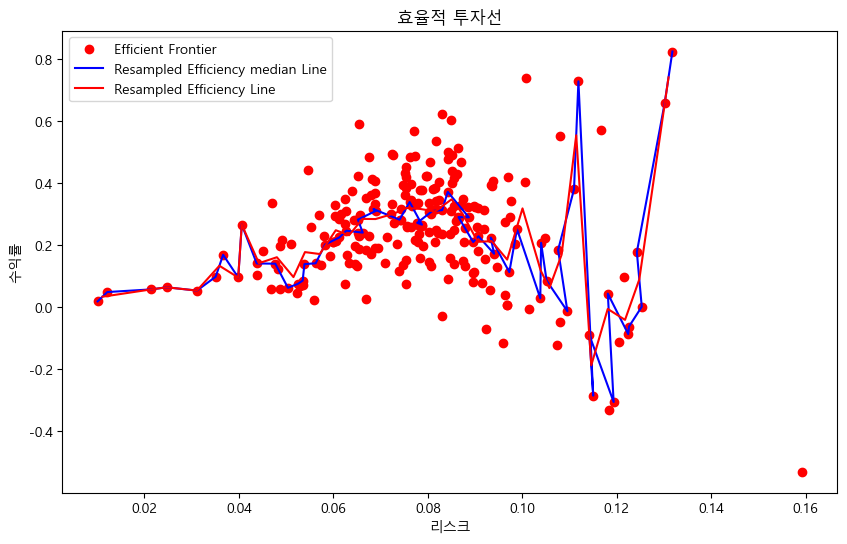

In [38]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2017 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2017 = pd.concat([weight_2017, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [39]:
median_xy_2017 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2017.columns = ['x', 'y']
median_xy_2017

x         y
0   0.010090  0.017502
1   0.012131  0.047652
2   0.021458  0.056252
3   0.024703  0.063012
4   0.031110  0.052388
5   0.035072  0.097000
6   0.036657  0.167852
7   0.039850  0.094624
8   0.040604  0.265181
9   0.043765  0.140059
10  0.047698  0.139052
11  0.050374  0.061348
12  0.052445  0.073938
13  0.053490  0.084352
14  0.053866  0.137708
15  0.056244  0.140440
16  0.058230  0.200824
17  0.061233  0.223709
18  0.062750  0.245566
19  0.066209  0.239359
20  0.065187  0.281404
21  0.068924  0.309071
22  0.068469  0.315356
23  0.073995  0.281132
24  0.076137  0.338141
25  0.078741  0.265044
26  0.077749  0.270984
27  0.080924  0.309027
28  0.083016  0.311921
29  0.084204  0.370861
30  0.088673  0.288694
31  0.086479  0.289514
32  0.089587  0.209076
33  0.090710  0.227635
34  0.094009  0.171417
35  0.093309  0.223266
36  0.097237  0.111969
37  0.098863  0.250712
38  0.103794  0.027584
39  0.103964  0.206489
40  0.105126  0.084753
41  0.109537 -0.014444
42  0.107568  0.183616
43  0.110935  0.379449
44  0.111865  0.727412
45  0.114997 -0.286638
46  0.114178 -0.090736
47  0.119322 -0.307030
48  0.118088  0.042510
49  0.122415 -0.088052
50  0.122574 -0.063606
51  0.125276  0.000379
52  0.124234  0.176564
53  0.130119  0.656759
54  0.131761  0.823674

## 2018

In [40]:
risk_free_rate = 0.01761
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01761):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [41]:
kospi = data_3['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_3['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_3['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_3['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 156 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 49 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 65 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\1564574342.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 67 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 67 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 51 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 86 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 81 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 61 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 90 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 179 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 92 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 179 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 74 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 196 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 179 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 187 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 152 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 80 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 76 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 151 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 75 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 198 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 159 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 79 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 168 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 173 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 81 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 80 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 150 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 183 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 139 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 73 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 181 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 174 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 147 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 166 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 75 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 163 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 169 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 51 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 109 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 149 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


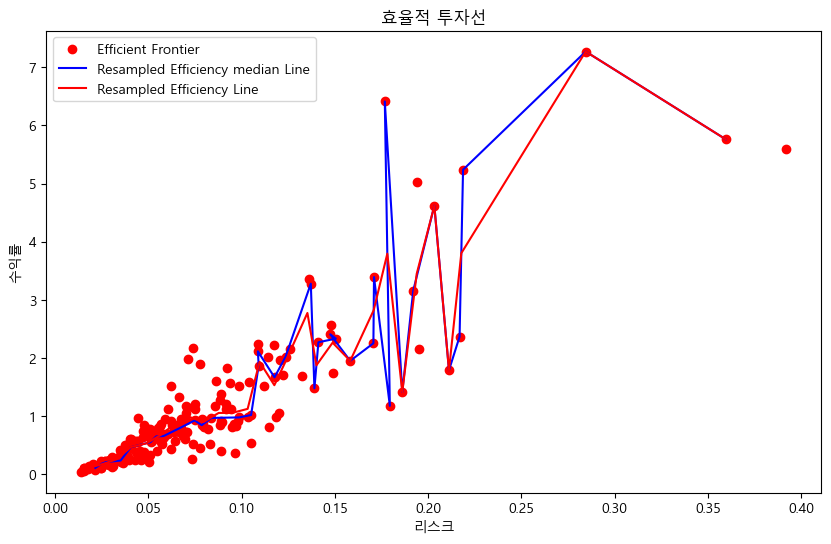

In [42]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2018 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2018 = pd.concat([weight_2018, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [43]:
median_xy_2018 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2018.columns = ['x', 'y']
median_xy_2018

x         y
0   0.021504  0.106442
1   0.024901  0.179201
2   0.027195  0.207174
3   0.035081  0.233736
4   0.040562  0.463264
5   0.051128  0.550177
6   0.051885  0.575593
7   0.054138  0.649448
8   0.058129  0.655068
9   0.067187  0.798542
10  0.074810  0.924075
11  0.078590  0.842537
12  0.083693  0.967020
13  0.098625  0.975730
14  0.105067  1.017031
15  0.109132  1.868293
16  0.108697  2.112994
17  0.117621  1.665697
18  0.123573  2.021110
19  0.137088  3.276873
20  0.139015  1.476416
21  0.141165  2.269104
22  0.150515  2.331468
23  0.147522  2.405390
24  0.158221  1.949303
25  0.170652  2.251695
26  0.170979  3.390580
27  0.179473  1.175389
28  0.176769  6.412197
29  0.186139  1.412137
30  0.192021  3.158114
31  0.203336  4.618000
32  0.211177  1.787525
33  0.216867  2.365020
34  0.218729  5.238025
35  0.284493  7.271585
36  0.359663  5.760057

## 2019

In [44]:
risk_free_rate = 0.01765
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01765):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [45]:
kospi = data_4['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_4['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_4['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_4['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 191 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 225 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 195 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 181 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 208 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3661837062.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 192 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 161 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 155 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 182 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 198 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 203 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 173 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 198 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 194 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 196 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 203 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 194 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 190 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 198 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 193 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 203 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 200 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 194 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 185 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 180 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 225 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 167 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 203 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 191 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 215 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 193 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 181 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 201 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 162 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 182 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 220 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 164 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 225 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 201 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 189 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 196 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 204 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 198 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 165 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 203 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 198 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 184 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 211 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 209 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 197 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 205 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 207 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 194 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 211 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 217 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 200 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 217 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 178 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 186 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 218 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 172 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 483 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 202 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 168 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 170 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 219 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 188 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 207 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 199 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 208 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 213 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 207 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 214 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 210 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 206 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


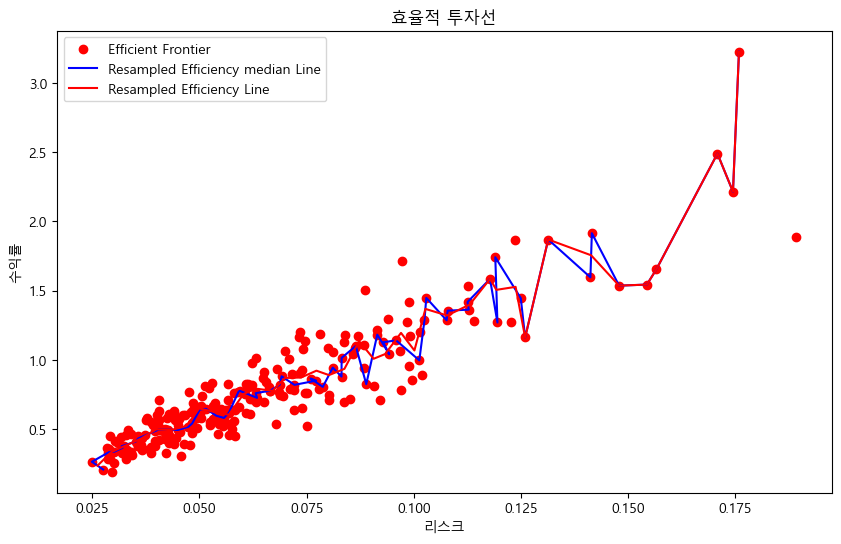

In [46]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2019 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2019 = pd.concat([weight_2019, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [47]:
median_xy_2019 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2019.columns = ['x', 'y']
median_xy_2019

x         y
0   0.027537  0.207654
1   0.024907  0.263598
2   0.028910  0.333242
3   0.030152  0.336009
4   0.032100  0.365228
5   0.031833  0.375972
6   0.035100  0.408717
7   0.035730  0.431716
8   0.040458  0.495807
9   0.044993  0.493181
10  0.047414  0.516374
11  0.048288  0.539949
12  0.050102  0.641263
13  0.051514  0.645858
14  0.053926  0.595912
15  0.055712  0.580037
16  0.056886  0.618901
17  0.059101  0.768865
18  0.059404  0.775596
19  0.063428  0.724910
20  0.063096  0.758735
21  0.066518  0.776873
22  0.068719  0.819836
23  0.069156  0.880613
24  0.072154  0.818785
25  0.077207  0.849361
26  0.075914  0.864500
27  0.078765  0.804196
28  0.081089  0.942882
29  0.083125  0.878575
30  0.083155  1.013790
31  0.086455  1.099108
32  0.088901  0.823979
33  0.091468  1.181223
34  0.094262  1.039800
35  0.092842  1.126408
36  0.095862  1.140044
37  0.101271  0.995829
38  0.102482  1.287497
39  0.102898  1.446773
40  0.107645  1.285078
41  0.107882  1.354419
42  0.112804  1.362009
43  0.112521  1.417168
44  0.117762  1.583604
45  0.119492  1.269125
46  0.118991  1.740416
47  0.124940  1.444289
48  0.125955  1.161128
49  0.131340  1.868234
50  0.141174  1.595240
51  0.141515  1.913642
52  0.147874  1.535215
53  0.154353  1.542825
54  0.156580  1.654024
55  0.170802  2.488417
56  0.174427  2.213568
57  0.175830  3.225511

## 2020

In [48]:
risk_free_rate = 0.01106
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01106):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [49]:
kospi = data_5['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_5['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_5['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_5['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 90 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 155 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 155 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 194 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 34 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 77 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\4162743637.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 209 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 75 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 489 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 184 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 72 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 161 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 38 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 69 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 66 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 153 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 494 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 452 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 198 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 484 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 183 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 213 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 66 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 204 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 33 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 167 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 172 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 64 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 156 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 70 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 109 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 183 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 51 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 63 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 199 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 173 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 183 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 187 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 180 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 211 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 153 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 29 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 480 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 469 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 468 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 197 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 92 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 218 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 460 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 477 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 483 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 198 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 219 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 475 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 471 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 150 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 58 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 62 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 485 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 161 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 149 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 162 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 203 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 48 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 155 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 196 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 202 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 64 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 463 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 60 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 163 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 63 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 57 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 81 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 452 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 167 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 84 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 147 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 461 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 152 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 75 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 470 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 159 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 182 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 476 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 464 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 168 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 165 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 487 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 92 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 436 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 170 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 75 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 169 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 175 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 64 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 455 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 459 제안된 프로포절 수: 1000
수락된 프로포절의 수: 478 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 190 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 471 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 466 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 86 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 462 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 199 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 473 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 429 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 490 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 210 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 179 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 195 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 178 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 474 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 479 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 82 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 472 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 191 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 73 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 467 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 151 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 481 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 186 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 444 제안된 프로포절 수: 1000


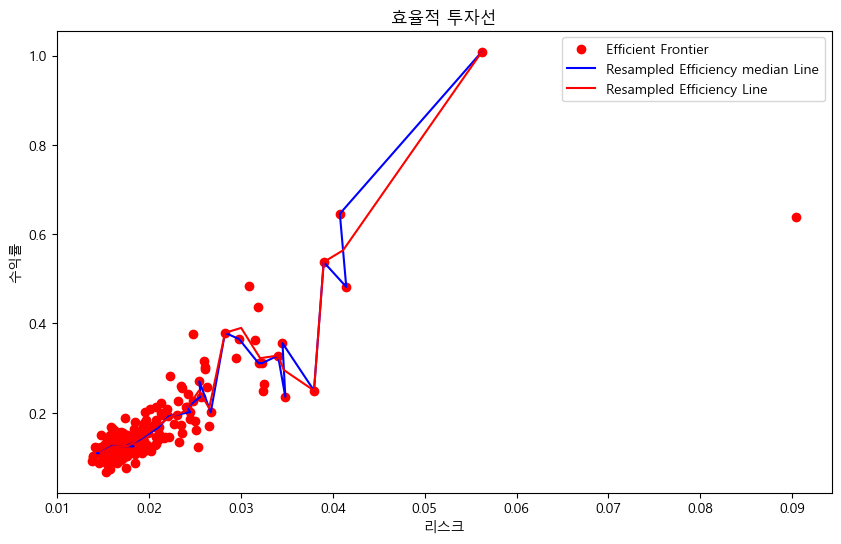

In [50]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2020 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2020 = pd.concat([weight_2020, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [51]:
median_xy_2020 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2020.columns = ['x', 'y']
median_xy_2020

x         y
0   0.014325  0.109380
1   0.014542  0.109468
2   0.015957  0.125649
3   0.018285  0.124696
4   0.017554  0.126391
5   0.018880  0.138544
6   0.021055  0.167717
7   0.022069  0.191534
8   0.024459  0.201395
9   0.024122  0.212293
10  0.025592  0.236035
11  0.025451  0.270357
12  0.026693  0.200912
13  0.028245  0.378983
14  0.029773  0.365112
15  0.031893  0.310886
16  0.032293  0.311051
17  0.034012  0.328074
18  0.034815  0.235219
19  0.034503  0.355853
20  0.037934  0.249667
21  0.038992  0.537554
22  0.041447  0.481911
23  0.040749  0.645764
24  0.056229  1.009201

## 2021

In [52]:
risk_free_rate = 0.00619
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.00619):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [53]:
kospi = data_6['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_6['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_6['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_6['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 456 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\1681838651.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 453 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 440 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 458 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 448 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 447 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 465 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 436 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 441 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 444 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 435 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 431 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 451 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 446 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 223 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 432 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 421 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 429 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 384 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 413 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 254 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 457 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 443 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


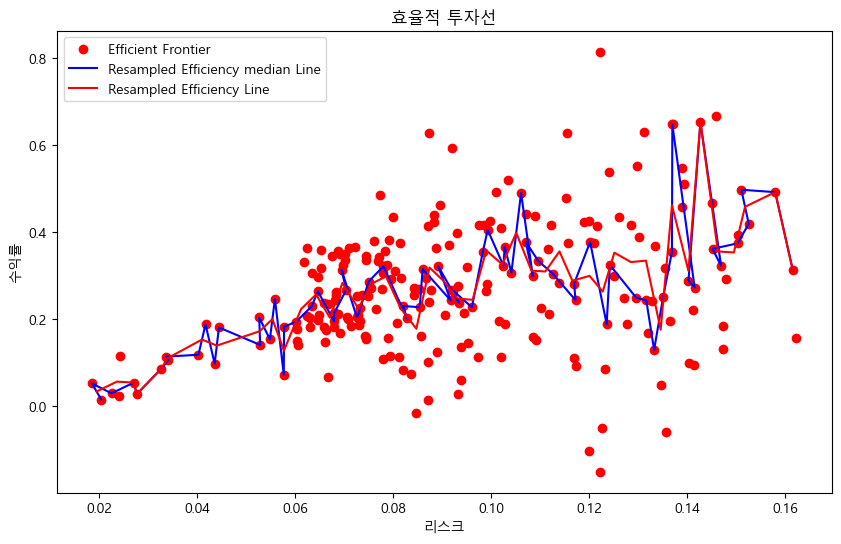

In [54]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2021 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2021 = pd.concat([weight_2021, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [55]:
median_xy_2021 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2021.columns = ['x', 'y']
median_xy_2021

x         y
0   0.020461  0.014075
1   0.018541  0.051410
2   0.022559  0.028518
3   0.027069  0.053264
4   0.027711  0.026831
..       ...       ...
64  0.150291  0.374081
65  0.152584  0.418993
66  0.151079  0.497581
67  0.157984  0.492026
68  0.161577  0.312206

[69 rows x 2 columns]

## 2022

In [56]:
risk_free_rate = 0.01496
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01496):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [57]:
kospi = data_7['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_7['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_7['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_7['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 229 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 379 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3054713436.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)


수락된 프로포절의 수: 223 제안된 프로포절 수: 1000
수락된 프로포절의 수: 79 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 226 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 68 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 384 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 76 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 80 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 155 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 212 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 89 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 69 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 177 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 94 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 141 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 131 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 215 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 98 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 95 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 394 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 176 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 154 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 397 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 157 제안된 프로포절 수: 1000
수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 99 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 256 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 242 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 130 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 112 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 389 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 87 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 122 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 222 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 262 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 171 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 111 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 216 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 253 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 82 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 160 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 233 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 220 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000
수락된 프로포절의 수: 148 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 388 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 78 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 249 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 85 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 79 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 87 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 263 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 241 제안된 프로포절 수: 1000
수락된 프로포절의 수: 116 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 228 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 104 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 230 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 269 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 158 제안된 프로포절 수: 1000
수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 383 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 236 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 224 제안된 프로포절 수: 1000
수락된 프로포절의 수: 143 제안된 프로포절 수: 1000
수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 106 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 144 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 83 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 247 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 153 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 119 제안된 프로포절 수: 1000
수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 136 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 260 제안된 프로포절 수: 1000
수락된 프로포절의 수: 103 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 395 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 107 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 237 제안된 프로포절 수: 1000
수락된 프로포절의 수: 127 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 118 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 132 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 100 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 120 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 231 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 235 제안된 프로포절 수: 1000
수락된 프로포절의 수: 128 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 113 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 221 제안된 프로포절 수: 1000
수락된 프로포절의 수: 108 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 125 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 227 제안된 프로포절 수: 1000
수락된 프로포절의 수: 88 제안된 프로포절 수: 1000
수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 117 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 375 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 261 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 257 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 97 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 101 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 246 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 140 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 268 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000
수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 126 제안된 프로포절 수: 1000
수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 243 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 245 제안된 프로포절 수: 1000
수락된 프로포절의 수: 142 제안된 프로포절 수: 1000
수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 96 제안된 프로포절 수: 1000
수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 254 제안된 프로포절 수: 1000
수락된 프로포절의 수: 138 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 255 제안된 프로포절 수: 1000
수락된 프로포절의 수: 93 제안된 프로포절 수: 1000
수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 115 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 240 제안된 프로포절 수: 1000
수락된 프로포절의 수: 105 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000
수락된 프로포절의 수: 123 제안된 프로포절 수: 1000
수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 244 제안된 프로포절 수: 1000
수락된 프로포절의 수: 134 제안된 프로포절 수: 1000
수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 250 제안된 프로포절 수: 1000
수락된 프로포절의 수: 114 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 252 제안된 프로포절 수: 1000
수락된 프로포절의 수: 91 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 145 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 387 제안된 프로포절 수: 1000
수락된 프로포절의 수: 251 제안된 프로포절 수: 1000
수락된 프로포절의 수: 137 제안된 프로포절 수: 1000
수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 376 제안된 프로포절 수: 1000
수락된 프로포절의 수: 234 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 239 제안된 프로포절 수: 1000
수락된 프로포절의 수: 124 제안된 프로포절 수: 1000
수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 259 제안된 프로포절 수: 1000
수락된 프로포절의 수: 146 제안된 프로포절 수: 1000
수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 265 제안된 프로포절 수: 1000
수락된 프로포절의 수: 135 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 232 제안된 프로포절 수: 1000
수락된 프로포절의 수: 121 제안된 프로포절 수: 1000
수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 238 제안된 프로포절 수: 1000
수락된 프로포절의 수: 102 제안된 프로포절 수: 1000
수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 277 제안된 프로포절 수: 1000
수락된 프로포절의 수: 133 제안된 프로포절 수: 1000
수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 248 제안된 프로포절 수: 1000
수락된 프로포절의 수: 110 제안된 프로포절 수: 1000
수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 272 제안된 프로포절 수: 1000
수락된 프로포절의 수: 129 제안된 프로포절 수: 1000
수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 355 제안된 프로포절 수: 1000


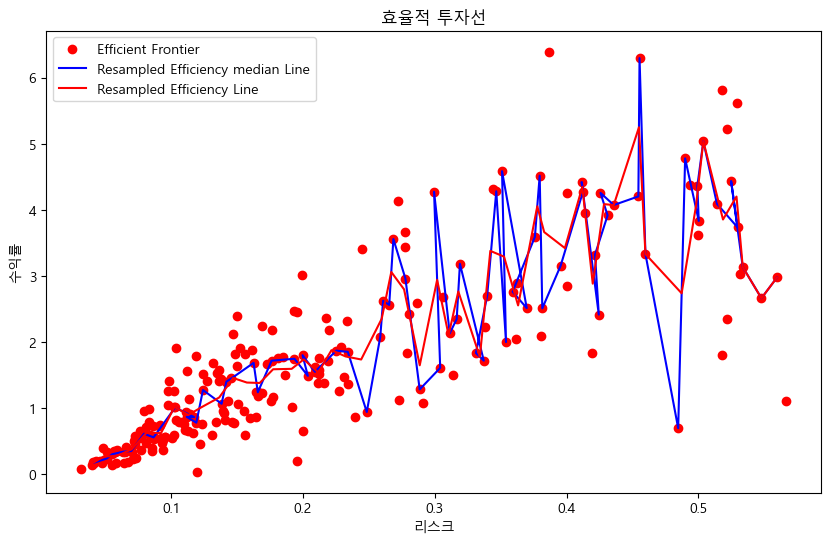

In [58]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2022 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2022 = pd.concat([weight_2022, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [59]:
median_xy_2022 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2022.columns = ['x', 'y']
median_xy_2022

x         y
0   0.041194  0.176188
1   0.051139  0.240656
2   0.055208  0.305087
3   0.063761  0.344259
4   0.069755  0.353555
..       ...       ...
64  0.529672  3.734714
65  0.524738  4.435963
66  0.533595  3.135813
67  0.547753  2.663917
68  0.559566  2.977849

[69 rows x 2 columns]

## 2023

In [60]:
risk_free_rate = 0.03690
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.03690):
    p_var, p_ret = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

In [61]:
kospi = data_8['KOSPI 200_return']
kospi = pd.DataFrame(kospi)
snp = data_8['S&P 500_return']
snp = pd.DataFrame(snp)
us_bond = data_8['US_BOND_return']
us_bond = pd.DataFrame(us_bond)
kr_bond = data_8['KOR_BOND_return']
kr_bond = pd.DataFrame(kr_bond)

C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000
수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\913452889.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 332 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 274 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 433 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 438 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 269 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 366 제안된 프로포절 수: 1000
수락된 프로포절의 수: 376 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 377 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 252 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 270 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 450 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 409 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 276 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 359 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 443 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 439 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 319 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 381 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 454 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 342 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 332 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 278 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 365 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 341 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 371 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 392 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 282 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 314 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 373 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 437 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 262 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 374 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 411 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 258 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000
수락된 프로포절의 수: 334 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 425 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 322 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 420 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 284 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 253 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 412 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 385 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 280 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 342 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000
수락된 프로포절의 수: 361 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 256 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 294 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 375 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 323 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 380 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 372 제안된 프로포절 수: 1000
수락된 프로포절의 수: 402 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 363 제안된 프로포절 수: 1000
수락된 프로포절의 수: 400 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 403 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 288 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 323 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 442 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000
수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 229 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 391 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 389 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 417 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 315 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 428 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 264 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 390 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 377 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 349 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 398 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 340 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 326 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 343 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 408 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 279 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 318 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 406 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 260 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 343 제안된 프로포절 수: 1000
수락된 프로포절의 수: 424 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 335 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 434 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 340 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 395 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 286 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 427 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 335 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 380 제안된 프로포절 수: 1000
수락된 프로포절의 수: 412 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000
수락된 프로포절의 수: 353 제안된 프로포절 수: 1000
수락된 프로포절의 수: 397 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 275 제안된 프로포절 수: 1000
수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 413 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 369 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 283 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 290 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 246 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000
수락된 프로포절의 수: 360 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 354 제안된 프로포절 수: 1000
수락된 프로포절의 수: 382 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 336 제안된 프로포절 수: 1000
수락된 프로포절의 수: 310 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 338 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 298 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 347 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000
수락된 프로포절의 수: 355 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 368 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000
수락된 프로포절의 수: 330 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 357 제안된 프로포절 수: 1000
수락된 프로포절의 수: 383 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 307 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 407 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 321 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 410 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 326 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 327 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 301 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000
수락된 프로포절의 수: 356 제안된 프로포절 수: 1000
수락된 프로포절의 수: 415 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 272 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 362 제안된 프로포절 수: 1000
수락된 프로포절의 수: 393 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 312 제안된 프로포절 수: 1000
수락된 프로포절의 수: 386 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 328 제안된 프로포절 수: 1000
수락된 프로포절의 수: 352 제안된 프로포절 수: 1000
수락된 프로포절의 수: 423 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 291 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 317 제안된 프로포절 수: 1000
수락된 프로포절의 수: 341 제안된 프로포절 수: 1000
수락된 프로포절의 수: 414 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 266 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 309 제안된 프로포절 수: 1000
수락된 프로포절의 수: 346 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 267 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 348 제안된 프로포절 수: 1000
수락된 프로포절의 수: 378 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 281 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 331 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 295 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 418 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 271 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 320 제안된 프로포절 수: 1000
수락된 프로포절의 수: 370 제안된 프로포절 수: 1000
수락된 프로포절의 수: 430 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 273 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 311 제안된 프로포절 수: 1000
수락된 프로포절의 수: 339 제안된 프로포절 수: 1000
수락된 프로포절의 수: 405 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 277 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 325 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 329 제안된 프로포절 수: 1000
수락된 프로포절의 수: 449 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 289 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 308 제안된 프로포절 수: 1000
수락된 프로포절의 수: 404 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 297 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 422 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 367 제안된 프로포절 수: 1000
수락된 프로포절의 수: 387 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 351 제안된 프로포절 수: 1000
수락된 프로포절의 수: 416 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 287 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 296 제안된 프로포절 수: 1000
수락된 프로포절의 수: 337 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\2734997454.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 426 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 304 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 303 제안된 프로포절 수: 1000
수락된 프로포절의 수: 344 제안된 프로포절 수: 1000
수락된 프로포절의 수: 419 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 310 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 313 제안된 프로포절 수: 1000
수락된 프로포절의 수: 364 제안된 프로포절 수: 1000
수락된 프로포절의 수: 394 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 316 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 285 제안된 프로포절 수: 1000
수락된 프로포절의 수: 350 제안된 프로포절 수: 1000
수락된 프로포절의 수: 445 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 293 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 334 제안된 프로포절 수: 1000
수락된 프로포절의 수: 388 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 324 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 299 제안된 프로포절 수: 1000
수락된 프로포절의 수: 358 제안된 프로포절 수: 1000
수락된 프로포절의 수: 399 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 302 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 292 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 305 제안된 프로포절 수: 1000
수락된 프로포절의 수: 401 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 306 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 338 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 345 제안된 프로포절 수: 1000
수락된 프로포절의 수: 396 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))
C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\3839646426.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 255 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\401392173.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 300 제안된 프로포절 수: 1000


C:\Users\qwe54\AppData\Local\Temp\ipykernel_8412\554880501.py:28: RuntimeWarning: invalid value encountered in scalar divide
  rat = (gene_dist_kospi(x0)/gene_dist_kospi(proposal))*(target_dist_kospi(proposal)/target_dist_kospi(x0))


수락된 프로포절의 수: 333 제안된 프로포절 수: 1000
수락된 프로포절의 수: 379 제안된 프로포절 수: 1000


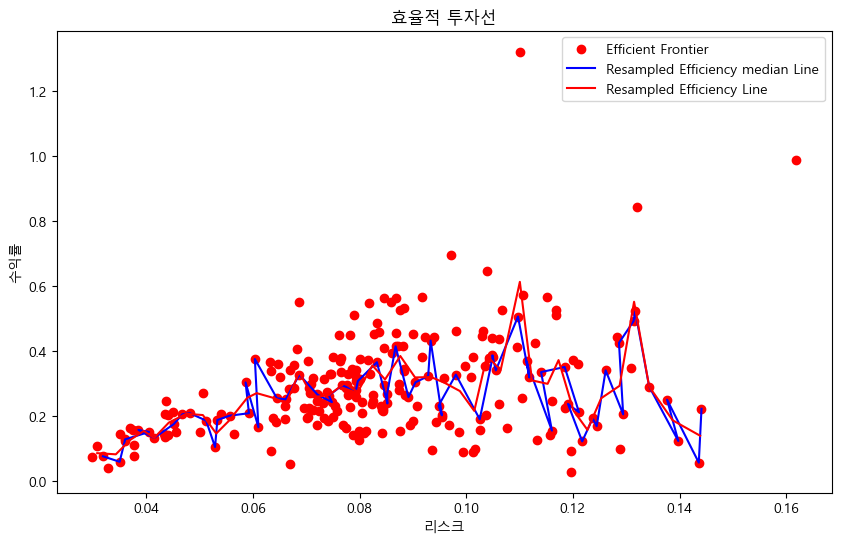

In [62]:
val = pd.DataFrame(columns=['x_values', 'y_values'])
ddd = pd.DataFrame()
weight_2023 = pd.DataFrame()

plt.figure(figsize=(10, 6))  # 그림의 크기 설정

for i in range(15):
    optimal_weights, weights_record, results_point = resampled_efficiency_optimization(n_iterations=20)
    target = np.linspace(min(results_point[0]), max(results_point[0]), 50)
    efficient_portfolios, efficient_weight = efficient_frontier(results_point, target, weights_record)
     
    # 효율적 포트폴리오 선 그리기
    x_values = [portfolio[0] for portfolio in efficient_portfolios]
    y_values = [portfolio[1] for portfolio in efficient_portfolios]
    ddd = pd.concat([ddd, pd.DataFrame(efficient_weight)], ignore_index=True)
    val = pd.concat([val, pd.DataFrame({'x_values': x_values, 'y_values': y_values})], ignore_index=True)

line = np.linspace(min(val['x_values']), max(val['x_values']), 50)


resampled_efficiency_line_median = pd.DataFrame()
resampled_efficiency_x_median = pd.DataFrame()
resampled_efficiency_line = []
resampled_efficiency_x_mean = []

for i in range(len(line) - 1):
    segment_indices = (val['x_values'] >= line[i]) & (val['x_values'] < line[i + 1])
    segment_values = val.loc[segment_indices, ['x_values', 'y_values']]
    # 만약 해당 구간에 값이 없다면 처리
    if segment_values.empty:
        continue
    
    sorted_values = segment_values['y_values'].sort_values()  # y_values를 정렬
    median_index = len(sorted_values) // 2  # 중앙 인덱스
    if len(sorted_values) % 2 == 0:  # 값의 개수가 짝수인 경우
        segment_y_median = sorted_values.iloc[median_index - 1:median_index + 1]
        row_median = segment_values.loc[segment_y_median.index]
    else:
        segment_y_median = sorted_values.iloc[median_index]  # 홀수인 경우 중앙값
        row_median = segment_values.loc[segment_values['y_values'] == segment_y_median]

    x_values_median = row_median.loc[:, 'x_values']
    y_values_median = row_median.loc[:, 'y_values']
    resampled_index = row_median.index
    resampled_weights = ddd.loc[resampled_index]
    resampled_efficiency_line_median = pd.concat([resampled_efficiency_line_median, y_values_median], ignore_index=True)
    resampled_efficiency_x_median = pd.concat([resampled_efficiency_x_median, x_values_median], ignore_index=True)
    weight_2023 = pd.concat([weight_2023, resampled_weights], ignore_index=True)

    # 평균 (Resampled efficiency 정의)
    segment_y_mean = segment_values['y_values'].mean()
    segment_x_mean = segment_values['x_values'].mean()
    resampled_efficiency_line.append(segment_y_mean)
    resampled_efficiency_x_mean.append(segment_x_mean)


# 산점도를 그립니다.
plt.scatter(val['x_values'], val['y_values'], color='red', label='Efficient Frontier')

# 각 line 구간의 x_values 평균과 y_values 평균을 선으로 연결하여 그립니다.
plt.plot(resampled_efficiency_x_median, resampled_efficiency_line_median, color='blue', label='Resampled Efficiency median Line')
plt.plot(resampled_efficiency_x_mean, resampled_efficiency_line, color='red', label='Resampled Efficiency Line')

plt.xlabel('리스크')
plt.ylabel('수익률')
plt.title('효율적 투자선')
plt.legend()
plt.show()

In [63]:
median_xy_2023 = pd.concat([resampled_efficiency_x_median, resampled_efficiency_line_median], axis=1)
median_xy_2023.columns = ['x', 'y']
median_xy_2023

x         y
0   0.031872  0.077197
1   0.034997  0.060308
2   0.035983  0.125445
3   0.036018  0.129181
4   0.040529  0.151933
..       ...       ...
58  0.134311  0.291440
59  0.139772  0.124337
60  0.137671  0.251031
61  0.143618  0.057710
62  0.144124  0.222987

[63 rows x 2 columns]

In [64]:
weight_2023

0         1             2             3
0   0.000000e+00  0.018137  4.184705e-02  9.400160e-01
1   0.000000e+00  0.121731  0.000000e+00  8.782687e-01
2   9.025904e-02  0.163257  1.537659e-01  5.927183e-01
3   2.483907e-16  0.235275  2.465949e-02  7.400655e-01
4   3.158215e-02  0.269442  1.766525e-01  5.223230e-01
..           ...       ...           ...           ...
58  0.000000e+00  1.000000  4.440892e-15  0.000000e+00
59  1.000000e+00  0.000000  1.110223e-16  2.220446e-16
60  4.635181e-15  1.000000  3.691492e-15  4.635181e-15
61  3.330669e-16  1.000000  5.551115e-17  2.775558e-16
62  1.054712e-14  1.000000  0.000000e+00  5.551115e-16

[63 rows x 4 columns]

## 백테스트

In [13]:
import plotly.graph_objects as go # 그래프 그릴 때 사용할 라이브러리입니다.
from plotly.subplots import make_subplots
data

KOSPI 200_return  S&P 500_return  US_BOND_return  \
Symbol Name                                                     
2014-04-01                NaN             NaN             NaN   
2014-04-02          -0.110039       -0.594969        0.633146   
2014-04-03          -1.478614       -1.394784       -1.226161   
2014-04-04          -1.361612       10.129908        5.497697   
2014-04-07           2.229151       -0.142544       -0.517595   
...                       ...             ...             ...   
2024-04-22          -1.677348       -1.996883       -0.882493   
2024-04-23          -1.208587        0.370327        5.332449   
2024-04-24          -9.395032       -0.982198       -2.971940   
2024-04-25          -1.910947      -22.486164        0.429159   
2024-04-26          -1.648758       -3.230804       -1.637102   

             KOR_BOND_return  S&P 500_cum  KSPI 200_cum  US_BOND_cum  \
Symbol Name                                                            
2014-04-01               NaN     0.007045      0.003254    -0.000960   
2014-04-02          5.098238     0.002853      0.002896    -0.001567   
2014-04-03         -1.331255    -0.001126     -0.001386     0.000354   
2014-04-04          2.019219    -0.012537      0.000501     0.002303   
2014-04-07          1.996190    -0.010750      0.001619     0.001111   
...                      ...          ...           ...          ...   
2024-04-22         -0.332541     0.008731      0.012224     0.000140   
2024-04-23         -1.875694     0.011965     -0.002550     0.000884   
2024-04-24         -1.618120     0.000213      0.021406    -0.001744   
2024-04-25          1.003278    -0.004576     -0.019499    -0.002492   
2024-04-26         -2.269811     0.010209      0.012650     0.001588   

             KOR_BOND_cum  snp_exposure_return(cum)  snp_hedged_return(cum)  \
Symbol Name                                                                   
2014-04-01      -0.000033                  0.004501                0.007044   
2014-04-02      -0.000198                 -0.002414                0.002852   
2014-04-03       0.000066                 -0.004423               -0.001126   
2014-04-04       0.000198                 -0.011510               -0.012535   
2014-04-07       0.000595                 -0.012620               -0.010751   
...                   ...                       ...                     ...   
2024-04-22      -0.000792                  0.015403                0.008734   
2024-04-23       0.000694                  0.008750                0.011964   
2024-04-24      -0.000429                 -0.001743                0.000212   
2024-04-25      -0.000859                 -0.010284               -0.004576   
2024-04-26       0.001091                  0.015076                0.010210   

             us_bond_exposure_return(cum)  us_bond_hedged_return(cum)  
Symbol Name                                                            
2014-04-01                      -0.003483                   -0.000960  
2014-04-02                      -0.006812                   -0.001568  
2014-04-03                      -0.002947                    0.000355  
2014-04-04                       0.003346                    0.002306  
2014-04-07                      -0.000781                    0.001111  
...                                   ...                         ...  
2024-04-22                       0.006754                    0.000143  
2024-04-23                      -0.002295                    0.000884  
2024-04-24                      -0.003696                   -0.001745  
2024-04-25                      -0.008212                   -0.002492  
2024-04-26                       0.006413                    0.001589  

[2388 rows x 12 columns]

In [14]:
data1 = data.loc["2016-02-01":"2024-02-02"]
data1

KOSPI 200_return  S&P 500_return  US_BOND_return  \
Symbol Name                                                     
2016-02-01           1.654253       -1.017901       -1.461088   
2016-02-02          -2.625944       41.286185       -4.596067   
2016-02-03          -0.161989       -1.266340       -1.158421   
2016-02-04          -2.866973       -0.694158       -2.715435   
2016-02-05          -0.902690      -13.104806       -0.854334   
...                       ...             ...             ...   
2024-01-29           7.842797      -12.593764       -5.234559   
2024-01-30          -1.098108       -1.079486       -0.722265   
2024-01-31           2.448119       25.813403        3.343254   
2024-02-01          -5.994156       -1.775731        0.094994   
2024-02-02           0.753878       -0.144811       -2.623690   

             KOR_BOND_return  S&P 500_cum  KSPI 200_cum  US_BOND_cum  \
Symbol Name                                                            
2016-02-01         -0.265436    -0.000443      0.006764    -0.001176   
2016-02-02         -0.795135    -0.018743     -0.010998     0.004230   
2016-02-03          0.749540     0.004992     -0.009217    -0.000670   
2016-02-04         -0.430109     0.001527      0.017207     0.001150   
2016-02-05         -1.000000    -0.018481      0.001674     0.000167   
...                      ...          ...           ...          ...   
2024-01-29         -1.903568     0.007557      0.010861     0.003790   
2024-01-30         -2.001250    -0.000601     -0.001066     0.001053   
2024-01-31         -0.684801    -0.016106     -0.003674     0.004572   
2024-02-01         -1.000000     0.012494      0.018350     0.005006   
2024-02-02               inf     0.010684      0.032184    -0.008129   

             KOR_BOND_cum  snp_exposure_return(cum)  snp_hedged_return(cum)  \
Symbol Name                                                                   
2016-02-01       0.001285                 -0.002263               -0.000447   
2016-02-02       0.000263                 -0.020126               -0.018740   
2016-02-03       0.000460                  0.003824                0.004989   
2016-02-04       0.000262                  0.012848                0.001528   
2016-02-05       0.000000                 -0.029775               -0.018480   
...                   ...                       ...                     ...   
2024-01-29      -0.001248                  0.008236                0.007561   
2024-01-30       0.001250                 -0.000376               -0.000602   
2024-01-31       0.000394                 -0.020742               -0.016101   
2024-02-01       0.000000                  0.014700                0.012495   
2024-02-02       0.001084                  0.009927                0.010677   

             us_bond_exposure_return(cum)  us_bond_hedged_return(cum)  
Symbol Name                                                            
2016-02-01                      -0.002995                   -0.001180  
2016-02-02                       0.002815                    0.004234  
2016-02-03                      -0.001832                   -0.000673  
2016-02-04                       0.012467                    0.001151  
2016-02-05                      -0.011341                    0.000168  
...                                   ...                         ...  
2024-01-29                       0.004466                    0.003794  
2024-01-30                       0.001277                    0.001051  
2024-01-31                      -0.000162                    0.004576  
2024-02-01                       0.007197                    0.005007  
2024-02-02                      -0.008872                   -0.008136  

[1898 rows x 12 columns]

In [15]:
kospi_back = data.loc["2024-02-01","KSPI 200_cum"] - data.loc["2016-02-01","KSPI 200_cum"]
kor_bond = data.loc["2024-02-01","KOR_BOND_cum"] - data.loc["2016-02-01","KOR_BOND_cum"]

## invest_list

In [25]:
target_return = target_return.iloc[2:]

In [26]:
target_return = target_return.loc['2016':]
target_return

목표수익률
2017  0.051017
2018  0.043835
2019  0.026296
2020 -0.001756
2021  0.068055
2022  0.077038
2023  0.049539

### 2015

In [36]:
weight_2015 = pd.read_csv('weight_2015.csv', index_col=0)
weight_2015 = pd.DataFrame(weight_2015)
weight_2015.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2015.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0      9.516078e-15    7.070511e-14        0.178581         0.821419
1      2.229514e-02    1.973470e-02        0.040467         0.917503
2      2.670661e-13    3.611795e-02        0.066262         0.897620
3      0.000000e+00    4.158451e-02        0.031182         0.927233
4      1.192238e-02    6.301532e-02        0.115603         0.809460

In [37]:
median_xy_2015 = pd.read_csv('median_xy_2015.csv', encoding='EUC-KR', index_col=0)
median_xy_2015.head(5)

x         y
0  0.017349  0.080084
1  0.015295  0.081387
2  0.019240  0.142080
3  0.021327  0.144073
4  0.026642  0.194645

In [38]:
target_return

목표수익률
2015  0.035149
2016  0.039213
2017  0.051017
2018  0.043835
2019  0.026296
2020 -0.001756
2021  0.068055
2022  0.077038
2023  0.049539

In [39]:
inv_2015 = median_xy_2015[median_xy_2015['x'] >  0.039213]
inv_2015_idx = inv_2015.index[0]
inv_list_2015 = weight_2015.loc[inv_2015_idx]
inv_list_2015

KOSPI 200_return    0.000000
S&P 500_return      0.091131
US_BOND_return      0.016613
KOR_BOND_return     0.892256
Name: 7, dtype: float64

In [40]:
invest_weight = pd.DataFrame()
invest_weight['weight_2016'] = inv_list_2015
invest_weight

weight_2016
KOSPI 200_return     0.000000
S&P 500_return       0.091131
US_BOND_return       0.016613
KOR_BOND_return      0.892256

### 2016

In [41]:
weight_2016 = pd.read_csv('weight_2016.csv', index_col=0)
weight_2016 = pd.DataFrame(weight_2016)
weight_2016.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2016.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0          0.231579    7.329813e-03        0.000000         0.761091
1          0.248576    5.376803e-10        0.000000         0.751424
2          0.095058    0.000000e+00        0.368746         0.536196
3          0.344460    7.985305e-12        0.311476         0.344064
4          0.338733    0.000000e+00        0.347433         0.313834

In [42]:
median_xy_2016 = pd.read_csv('median_xy_2016.csv', index_col=0, encoding='EUC-KR')
median_xy_2016.head(5)

x         y
0  0.020214  0.042808
1  0.024515  0.056139
2  0.031511  0.054281
3  0.040957  0.142147
4  0.040292  0.157252

In [43]:
target_return.loc[2017]

목표수익률    0.051017
Name: 2017, dtype: float64

In [44]:
inv_2016 = median_xy_2016[median_xy_2016['x'] > 0.051017]
inv_2016_idx = inv_2016.index[0]
inv_list_2016 = weight_2016.loc[inv_2016_idx]
inv_list_2016

KOSPI 200_return    5.075977e-01
S&P 500_return      0.000000e+00
US_BOND_return      4.924023e-01
KOR_BOND_return     1.304922e-16
Name: 7, dtype: float64

In [45]:
invest_weight['weight_2017'] = inv_list_2016
invest_weight

weight_2016   weight_2017
KOSPI 200_return     0.000000  5.075977e-01
S&P 500_return       0.091131  0.000000e+00
US_BOND_return       0.016613  4.924023e-01
KOR_BOND_return      0.892256  1.304922e-16

### 2017

In [46]:
weight_2017 = pd.read_csv('weight_2017.csv', index_col=0)
weight_2017 = pd.DataFrame(weight_2017)
weight_2017.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2017.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0          0.000000    0.000000e+00    0.000000e+00         1.000000
1          0.089115    0.000000e+00    5.287165e-12         0.910885
2          0.243624    0.000000e+00    4.729843e-02         0.709078
3          0.080884    0.000000e+00    3.555566e-01         0.563559
4          0.293047    4.848632e-14    1.571718e-02         0.691236

In [47]:
target_return.loc[2018]

목표수익률    0.043835
Name: 2018, dtype: float64

In [48]:
median_xy_2017 = pd.read_csv('median_xy_2017.csv', index_col=0, encoding='EUC-KR')
median_xy_2017.head(5)

x         y
0  0.010090  0.017502
1  0.012131  0.047652
2  0.021458  0.056252
3  0.024703  0.063012
4  0.031110  0.052388

In [49]:
inv_2017 = median_xy_2017[median_xy_2017['x'] > 0.051017]
inv_2017_idx = inv_2017.index[0]
inv_list_2017 = weight_2017.loc[inv_2017_idx]
inv_list_2017

KOSPI 200_return    3.561192e-01
S&P 500_return      1.328664e-14
US_BOND_return      6.438808e-01
KOR_BOND_return     1.396014e-15
Name: 12, dtype: float64

In [50]:
invest_weight['weight_2018'] = inv_list_2017
invest_weight

weight_2016   weight_2017   weight_2018
KOSPI 200_return     0.000000  5.075977e-01  3.561192e-01
S&P 500_return       0.091131  0.000000e+00  1.328664e-14
US_BOND_return       0.016613  4.924023e-01  6.438808e-01
KOR_BOND_return      0.892256  1.304922e-16  1.396014e-15

### 2018

In [51]:
weight_2018 = pd.read_csv('weight_2018.csv', index_col=0)
weight_2018 = pd.DataFrame(weight_2018)
weight_2018.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2018.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0      1.321785e-13        0.017953        0.112805         0.869242
1      3.900377e-02        0.046590        0.222584         0.691822
2      3.147279e-02        0.051842        0.122859         0.793826
3      3.831052e-03        0.000000        0.481171         0.514998
4      5.605609e-02        0.070992        0.060201         0.812751

In [52]:
target_return.loc[2019]

목표수익률    0.026296
Name: 2019, dtype: float64

In [53]:
median_xy_2018 = pd.read_csv('median_xy_2018.csv', index_col=0, encoding='EUC-KR')
median_xy_2018.head(5)

x         y
0  0.021504  0.106442
1  0.024901  0.179201
2  0.027195  0.207174
3  0.035081  0.233736
4  0.040562  0.463264

In [54]:
inv_2018 = median_xy_2018[median_xy_2018['x'] > 0.026296]
inv_2018_idx = inv_2018.index[0]
inv_list_2018 = weight_2018.loc[inv_2018_idx]
inv_list_2018

KOSPI 200_return    0.031473
S&P 500_return      0.051842
US_BOND_return      0.122859
KOR_BOND_return     0.793826
Name: 2, dtype: float64

In [55]:
invest_weight['weight_2019'] = inv_list_2018
invest_weight

weight_2016   weight_2017   weight_2018  weight_2019
KOSPI 200_return     0.000000  5.075977e-01  3.561192e-01     0.031473
S&P 500_return       0.091131  0.000000e+00  1.328664e-14     0.051842
US_BOND_return       0.016613  4.924023e-01  6.438808e-01     0.122859
KOR_BOND_return      0.892256  1.304922e-16  1.396014e-15     0.793826

### 2019

In [56]:
weight_2019 = pd.read_csv('weight_2019.csv', index_col=0)
weight_2019 = pd.DataFrame(weight_2019)
weight_2019.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2019.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0      2.237384e-14        0.137664        0.086522         0.775814
1      5.939824e-02        0.127860        0.198318         0.614424
2      4.479645e-02        0.157782        0.121877         0.675544
3      0.000000e+00        0.132083        0.209793         0.658123
4      7.155504e-02        0.146607        0.108598         0.673240

In [57]:
target_return.loc[2020]

목표수익률   -0.001756
Name: 2020, dtype: float64

In [58]:
median_xy_2019 = pd.read_csv('median_xy_2019.csv', index_col=0, encoding='EUC-KR')
median_xy_2019.head(5)

x         y
0  0.027537  0.207654
1  0.024907  0.263598
2  0.028910  0.333242
3  0.030152  0.336009
4  0.032100  0.365228

In [59]:
inv_2019 = median_xy_2019[median_xy_2019['x'] > -0.001756]
inv_2019_idx = inv_2019.index[0]
inv_list_2019 = weight_2019.loc[inv_2019_idx]
inv_list_2019

KOSPI 200_return    2.237384e-14
S&P 500_return      1.376640e-01
US_BOND_return      8.652228e-02
KOR_BOND_return     7.758137e-01
Name: 0, dtype: float64

In [60]:
invest_weight['weight_2020'] = inv_list_2019
invest_weight

weight_2016   weight_2017   weight_2018  weight_2019  \
KOSPI 200_return     0.000000  5.075977e-01  3.561192e-01     0.031473   
S&P 500_return       0.091131  0.000000e+00  1.328664e-14     0.051842   
US_BOND_return       0.016613  4.924023e-01  6.438808e-01     0.122859   
KOR_BOND_return      0.892256  1.304922e-16  1.396014e-15     0.793826   

                   weight_2020  
KOSPI 200_return  2.237384e-14  
S&P 500_return    1.376640e-01  
US_BOND_return    8.652228e-02  
KOR_BOND_return   7.758137e-01

### 2020

In [61]:
weight_2020 = pd.read_csv('weight_2020.csv', index_col=0)
weight_2020 = pd.DataFrame(weight_2020)
weight_2020.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2020.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0      1.929768e-02    2.084399e-11        0.039668         0.941042
1      1.466796e-02    0.000000e+00        0.025938         0.959394
2      2.189212e-02    3.167656e-10        0.078184         0.899924
3      3.154448e-02    5.780964e-03        0.069948         0.892727
4      4.399363e-11    0.000000e+00        0.074375         0.925628

In [62]:
target_return.loc[2021]

목표수익률    0.068055
Name: 2021, dtype: float64

In [63]:
median_xy_2020 = pd.read_csv('median_xy_2020.csv', index_col=0, encoding='EUC-KR')
median_xy_2020.head(5)

x         y
0  0.014325  0.109380
1  0.014542  0.109468
2  0.015957  0.125649
3  0.018285  0.124696
4  0.017554  0.126391

In [64]:
inv_2020 = median_xy_2020[median_xy_2020['x'] >  0.068055]
inv_2020_idx = inv_2020.index[0]
inv_list_2020 = weight_2020.loc[inv_2020_idx]
inv_list_2020
# 해당하는 포트폴리오가 없음 -> 가장 안정성이 높은 포트폴리오로 투자

IndexError: index 0 is out of bounds for axis 0 with size 0

In [66]:
inv_2020 = median_xy_2020[median_xy_2020['y'] == np.min(median_xy_2020['y'])]
inv_2020_idx = inv_2020.index[0]
inv_list_2020 = weight_2020.loc[inv_2020_idx]
inv_list_2020

KOSPI 200_return    1.929768e-02
S&P 500_return      2.084399e-11
US_BOND_return      3.966839e-02
KOR_BOND_return     9.410417e-01
Name: 0, dtype: float64

In [67]:
invest_weight['weight_2021'] = inv_list_2020
invest_weight

weight_2016   weight_2017   weight_2018  weight_2019  \
KOSPI 200_return     0.000000  5.075977e-01  3.561192e-01     0.031473   
S&P 500_return       0.091131  0.000000e+00  1.328664e-14     0.051842   
US_BOND_return       0.016613  4.924023e-01  6.438808e-01     0.122859   
KOR_BOND_return      0.892256  1.304922e-16  1.396014e-15     0.793826   

                   weight_2020   weight_2021  
KOSPI 200_return  2.237384e-14  1.929768e-02  
S&P 500_return    1.376640e-01  2.084399e-11  
US_BOND_return    8.652228e-02  3.966839e-02  
KOR_BOND_return   7.758137e-01  9.410417e-01

### 2021

In [68]:
weight_2021 = pd.read_csv('weight_2021.csv', index_col=0)
weight_2021 = pd.DataFrame(weight_2021)
weight_2021.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2021.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0      3.471793e-13        0.105022    0.000000e+00         0.894978
1      0.000000e+00        0.066089    9.278570e-02         0.841125
2      0.000000e+00        0.138289    9.032652e-15         0.861711
3      1.263042e-01        0.000000    2.292620e-01         0.644434
4      1.406374e-12        0.201333    0.000000e+00         0.798667

In [69]:
target_return.loc[2022]

목표수익률    0.077038
Name: 2022, dtype: float64

In [70]:
median_xy_2021 = pd.read_csv('median_xy_2021.csv', index_col=0, encoding='EUC-KR')
median_xy_2021.head(5)

x         y
0  0.020461  0.014075
1  0.018541  0.051410
2  0.022559  0.028518
3  0.027069  0.053264
4  0.027711  0.026831

In [71]:
inv_2021 = median_xy_2021[median_xy_2021['x'] > 0.077038]
inv_2021_idx = inv_2021.index[0]
inv_list_2021 = weight_2021.loc[inv_2021_idx]
inv_list_2021

KOSPI 200_return    6.085274e-15
S&P 500_return      5.883108e-01
US_BOND_return      4.116892e-01
KOR_BOND_return     0.000000e+00
Name: 28, dtype: float64

In [72]:
invest_weight['weight_2022'] = inv_list_2021
invest_weight

weight_2016   weight_2017   weight_2018  weight_2019  \
KOSPI 200_return     0.000000  5.075977e-01  3.561192e-01     0.031473   
S&P 500_return       0.091131  0.000000e+00  1.328664e-14     0.051842   
US_BOND_return       0.016613  4.924023e-01  6.438808e-01     0.122859   
KOR_BOND_return      0.892256  1.304922e-16  1.396014e-15     0.793826   

                   weight_2020   weight_2021   weight_2022  
KOSPI 200_return  2.237384e-14  1.929768e-02  6.085274e-15  
S&P 500_return    1.376640e-01  2.084399e-11  5.883108e-01  
US_BOND_return    8.652228e-02  3.966839e-02  4.116892e-01  
KOR_BOND_return   7.758137e-01  9.410417e-01  0.000000e+00

### 2022

In [73]:
weight_2022 = pd.read_csv('weight_2022.csv', index_col=0)
weight_2022 = pd.DataFrame(weight_2022)
weight_2022.columns = ['KOSPI 200_return', 'S&P 500_return', 'US_BOND_return', 'KOR_BOND_return']
weight_2022.head(5)

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
0      6.746451e-15        0.051247    0.000000e+00         0.948753
1      8.028728e-16        0.080000    0.000000e+00         0.920000
2      0.000000e+00        0.076995    7.243549e-15         0.923005
3      0.000000e+00        0.107191    5.447966e-02         0.838329
4      3.912221e-02        0.123271    1.837491e-02         0.819232

In [74]:
target_return.loc[2023]

목표수익률    0.049539
Name: 2023, dtype: float64

In [75]:
median_xy_2022 = pd.read_csv('median_xy_2022.csv', index_col=0, encoding='EUC-KR')
median_xy_2022.head(5)

x         y
0  0.041194  0.176188
1  0.051139  0.240656
2  0.055208  0.305087
3  0.063761  0.344259
4  0.069755  0.353555

In [76]:
inv_2022 = median_xy_2022[median_xy_2022['x'] > 0.049539]
inv_2022_idx = inv_2022.index[0]
inv_list_2022 = weight_2022.loc[inv_2022_idx]
inv_list_2022

KOSPI 200_return    8.028728e-16
S&P 500_return      8.000016e-02
US_BOND_return      0.000000e+00
KOR_BOND_return     9.199998e-01
Name: 1, dtype: float64

In [77]:
invest_weight['weight_2023'] = inv_list_2022
invest_weight

weight_2016   weight_2017   weight_2018  weight_2019  \
KOSPI 200_return     0.000000  5.075977e-01  3.561192e-01     0.031473   
S&P 500_return       0.091131  0.000000e+00  1.328664e-14     0.051842   
US_BOND_return       0.016613  4.924023e-01  6.438808e-01     0.122859   
KOR_BOND_return      0.892256  1.304922e-16  1.396014e-15     0.793826   

                   weight_2020   weight_2021   weight_2022   weight_2023  
KOSPI 200_return  2.237384e-14  1.929768e-02  6.085274e-15  8.028728e-16  
S&P 500_return    1.376640e-01  2.084399e-11  5.883108e-01  8.000016e-02  
US_BOND_return    8.652228e-02  3.966839e-02  4.116892e-01  0.000000e+00  
KOR_BOND_return   7.758137e-01  9.410417e-01  0.000000e+00  9.199998e-01

## 진짜 계산

In [78]:
invest_weight = invest_weight.T

In [79]:
invest_weight

KOSPI 200_return  S&P 500_return  US_BOND_return  KOR_BOND_return
weight_2016      0.000000e+00    9.113059e-02        0.016613     8.922562e-01
weight_2017      5.075977e-01    0.000000e+00        0.492402     1.304922e-16
weight_2018      3.561192e-01    1.328664e-14        0.643881     1.396014e-15
weight_2019      3.147279e-02    5.184161e-02        0.122859     7.938262e-01
weight_2020      2.237384e-14    1.376640e-01        0.086522     7.758137e-01
weight_2021      1.929768e-02    2.084399e-11        0.039668     9.410417e-01
weight_2022      6.085274e-15    5.883108e-01        0.411689     0.000000e+00
weight_2023      8.028728e-16    8.000016e-02        0.000000     9.199998e-01

In [80]:
data1

KOSPI 200_return  S&P 500_return  US_BOND_return  \
Symbol Name                                                     
2016-02-01           1.654253       -1.017901       -1.461088   
2016-02-02          -2.625944       41.286185       -4.596067   
2016-02-03          -0.161989       -1.266340       -1.158421   
2016-02-04          -2.866973       -0.694158       -2.715435   
2016-02-05          -0.902690      -13.104806       -0.854334   
...                       ...             ...             ...   
2024-01-29           7.842797      -12.593764       -5.234559   
2024-01-30          -1.098108       -1.079486       -0.722265   
2024-01-31           2.448119       25.813403        3.343254   
2024-02-01          -5.994156       -1.775731        0.094994   
2024-02-02           0.753878       -0.144811       -2.623690   

             KOR_BOND_return  S&P 500_cum  KSPI 200_cum  US_BOND_cum  \
Symbol Name                                                            
2016-02-01         -0.265436    -0.000443      0.006764    -0.001176   
2016-02-02         -0.795135    -0.018743     -0.010998     0.004230   
2016-02-03          0.749540     0.004992     -0.009217    -0.000670   
2016-02-04         -0.430109     0.001527      0.017207     0.001150   
2016-02-05         -1.000000    -0.018481      0.001674     0.000167   
...                      ...          ...           ...          ...   
2024-01-29         -1.903568     0.007557      0.010861     0.003790   
2024-01-30         -2.001250    -0.000601     -0.001066     0.001053   
2024-01-31         -0.684801    -0.016106     -0.003674     0.004572   
2024-02-01         -1.000000     0.012494      0.018350     0.005006   
2024-02-02               inf     0.010684      0.032184    -0.008129   

             KOR_BOND_cum  snp_exposure_return(cum)  snp_hedged_return(cum)  \
Symbol Name                                                                   
2016-02-01       0.001285                 -0.002263               -0.000447   
2016-02-02       0.000263                 -0.020126               -0.018740   
2016-02-03       0.000460                  0.003824                0.004989   
2016-02-04       0.000262                  0.012848                0.001528   
2016-02-05       0.000000                 -0.029775               -0.018480   
...                   ...                       ...                     ...   
2024-01-29      -0.001248                  0.008236                0.007561   
2024-01-30       0.001250                 -0.000376               -0.000602   
2024-01-31       0.000394                 -0.020742               -0.016101   
2024-02-01       0.000000                  0.014700                0.012495   
2024-02-02       0.001084                  0.009927                0.010677   

             us_bond_exposure_return(cum)  us_bond_hedged_return(cum)  
Symbol Name                                                            
2016-02-01                      -0.002995                   -0.001180  
2016-02-02                       0.002815                    0.004234  
2016-02-03                      -0.001832                   -0.000673  
2016-02-04                       0.012467                    0.001151  
2016-02-05                      -0.011341                    0.000168  
...                                   ...                         ...  
2024-01-29                       0.004466                    0.003794  
2024-01-30                       0.001277                    0.001051  
2024-01-31                      -0.000162                    0.004576  
2024-02-01                       0.007197                    0.005007  
2024-02-02                      -0.008872                   -0.008136  

[1898 rows x 12 columns]

In [81]:
data2 = data.loc[:, 'S&P 500_cum':]
data2 = data2.iloc[1:]
data2

S&P 500_cum  KSPI 200_cum  US_BOND_cum  KOR_BOND_cum  \
Symbol Name                                                         
2014-04-02      0.002853      0.002896    -0.001567     -0.000198   
2014-04-03     -0.001126     -0.001386     0.000354      0.000066   
2014-04-04     -0.012537      0.000501     0.002303      0.000198   
2014-04-07     -0.010750      0.001619     0.001111      0.000595   
2014-04-08      0.003751      0.002232     0.000454     -0.000099   
...                  ...           ...          ...           ...   
2024-04-22      0.008731      0.012224     0.000140     -0.000792   
2024-04-23      0.011965     -0.002550     0.000884      0.000694   
2024-04-24      0.000213      0.021406    -0.001744     -0.000429   
2024-04-25     -0.004576     -0.019499    -0.002492     -0.000859   
2024-04-26      0.010209      0.012650     0.001588      0.001091   

             snp_exposure_return(cum)  snp_hedged_return(cum)  \
Symbol Name                                                     
2014-04-02                  -0.002414                0.002852   
2014-04-03                  -0.004423               -0.001126   
2014-04-04                  -0.011510               -0.012535   
2014-04-07                  -0.012620               -0.010751   
2014-04-08                   0.001184                0.003752   
...                               ...                     ...   
2024-04-22                   0.015403                0.008734   
2024-04-23                   0.008750                0.011964   
2024-04-24                  -0.001743                0.000212   
2024-04-25                  -0.010284               -0.004576   
2024-04-26                   0.015076                0.010210   

             us_bond_exposure_return(cum)  us_bond_hedged_return(cum)  
Symbol Name                                                            
2014-04-02                      -0.006812                   -0.001568  
2014-04-03                      -0.002947                    0.000355  
2014-04-04                       0.003346                    0.002306  
2014-04-07                      -0.000781                    0.001111  
2014-04-08                      -0.002104                    0.000455  
...                                   ...                         ...  
2024-04-22                       0.006754                    0.000143  
2024-04-23                      -0.002295                    0.000884  
2024-04-24                      -0.003696                   -0.001745  
2024-04-25                      -0.008212                   -0.002492  
2024-04-26                       0.006413                    0.001589  

[2387 rows x 8 columns]

In [82]:
data1_2016 = data2.loc['2016-02-02':'2017-02-01']
data1_2017 = data2.loc['2017-02-02':'2018-02-01']
data1_2018 = data2.loc['2018-02-02':'2019-02-01']
data1_2019 = data2.loc['2019-02-02':'2020-02-01']
data1_2020 = data2.loc['2020-02-02':'2021-02-01']
data1_2021 = data2.loc['2021-02-02':'2022-02-01']
data1_2022 = data2.loc['2022-02-02':'2023-02-01']
data1_2023 = data2.loc['2023-02-02':'2024-02-01']

In [83]:
data2_2016 = data1_2016[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2017 = data1_2017[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2018 = data1_2018[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2019 = data1_2019[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2020 = data1_2020[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2021 = data1_2021[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2022 = data1_2022[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data2_2023 = data1_2023[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]

In [84]:
invest_list = pd.DataFrame(invest_weight)
invest_list.columns = [['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
invest_list

KSPI 200_cum snp_exposure_return(cum)  \
weight_2016  0.000000e+00             9.113059e-02   
weight_2017  5.075977e-01             0.000000e+00   
weight_2018  3.561192e-01             1.328664e-14   
weight_2019  3.147279e-02             5.184161e-02   
weight_2020  2.237384e-14             1.376640e-01   
weight_2021  1.929768e-02             2.084399e-11   
weight_2022  6.085274e-15             5.883108e-01   
weight_2023  8.028728e-16             8.000016e-02   

            us_bond_exposure_return(cum)  KOR_BOND_cum  
weight_2016                     0.016613  8.922562e-01  
weight_2017                     0.492402  1.304922e-16  
weight_2018                     0.643881  1.396014e-15  
weight_2019                     0.122859  7.938262e-01  
weight_2020                     0.086522  7.758137e-01  
weight_2021                     0.039668  9.410417e-01  
weight_2022                     0.411689  0.000000e+00  
weight_2023                     0.000000  9.199998e-01

In [85]:
invest_list

KSPI 200_cum snp_exposure_return(cum)  \
weight_2016  0.000000e+00             9.113059e-02   
weight_2017  5.075977e-01             0.000000e+00   
weight_2018  3.561192e-01             1.328664e-14   
weight_2019  3.147279e-02             5.184161e-02   
weight_2020  2.237384e-14             1.376640e-01   
weight_2021  1.929768e-02             2.084399e-11   
weight_2022  6.085274e-15             5.883108e-01   
weight_2023  8.028728e-16             8.000016e-02   

            us_bond_exposure_return(cum)  KOR_BOND_cum  
weight_2016                     0.016613  8.922562e-01  
weight_2017                     0.492402  1.304922e-16  
weight_2018                     0.643881  1.396014e-15  
weight_2019                     0.122859  7.938262e-01  
weight_2020                     0.086522  7.758137e-01  
weight_2021                     0.039668  9.410417e-01  
weight_2022                     0.411689  0.000000e+00  
weight_2023                     0.000000  9.199998e-01

In [86]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
weights_df = pd.DataFrame(invest_list)
weights_df = weights_df.reset_index(drop=True)
weights_df.index = years
weights_df

KSPI 200_cum snp_exposure_return(cum) us_bond_exposure_return(cum)  \
2016  0.000000e+00             9.113059e-02                     0.016613   
2017  5.075977e-01             0.000000e+00                     0.492402   
2018  3.561192e-01             1.328664e-14                     0.643881   
2019  3.147279e-02             5.184161e-02                     0.122859   
2020  2.237384e-14             1.376640e-01                     0.086522   
2021  1.929768e-02             2.084399e-11                     0.039668   
2022  6.085274e-15             5.883108e-01                     0.411689   
2023  8.028728e-16             8.000016e-02                     0.000000   

      KOR_BOND_cum  
2016  8.922562e-01  
2017  1.304922e-16  
2018  1.396014e-15  
2019  7.938262e-01  
2020  7.758137e-01  
2021  9.410417e-01  
2022  0.000000e+00  
2023  9.199998e-01

In [87]:
data2_2016['포트폴리오 가치'] = weights_df.iloc[0,0]*data2_2016['KSPI 200_cum'] + weights_df.iloc[0,1]*data2_2016['snp_exposure_return(cum)']+weights_df.iloc[0,2]*data2_2016['us_bond_exposure_return(cum)']+weights_df.iloc[0,3]*data2_2016['KOR_BOND_cum']
data2_2017['포트폴리오 가치'] = weights_df.iloc[1,0]*data2_2017['KSPI 200_cum'] + weights_df.iloc[1,1]*data2_2017['snp_exposure_return(cum)']+weights_df.iloc[1,2]*data2_2017['us_bond_exposure_return(cum)']+weights_df.iloc[1,3]*data2_2017['KOR_BOND_cum']
data2_2018['포트폴리오 가치'] = weights_df.iloc[2,0]*data2_2018['KSPI 200_cum'] + weights_df.iloc[2,1]*data2_2018['snp_exposure_return(cum)']+weights_df.iloc[2,2]*data2_2018['us_bond_exposure_return(cum)']+weights_df.iloc[2,3]*data2_2018['KOR_BOND_cum']
data2_2019['포트폴리오 가치'] = weights_df.iloc[3,0]*data2_2019['KSPI 200_cum'] + weights_df.iloc[3,1]*data2_2019['snp_exposure_return(cum)']+weights_df.iloc[3,2]*data2_2019['us_bond_exposure_return(cum)']+weights_df.iloc[3,3]*data2_2019['KOR_BOND_cum']
data2_2020['포트폴리오 가치'] = weights_df.iloc[4,0]*data2_2020['KSPI 200_cum'] + weights_df.iloc[4,1]*data2_2020['snp_exposure_return(cum)']+weights_df.iloc[4,2]*data2_2020['us_bond_exposure_return(cum)']+weights_df.iloc[4,3]*data2_2020['KOR_BOND_cum']
data2_2021['포트폴리오 가치'] = weights_df.iloc[5,0]*data2_2021['KSPI 200_cum'] + weights_df.iloc[5,1]*data2_2021['snp_exposure_return(cum)']+weights_df.iloc[5,2]*data2_2021['us_bond_exposure_return(cum)']+weights_df.iloc[5,3]*data2_2021['KOR_BOND_cum']
data2_2022['포트폴리오 가치'] = weights_df.iloc[6,0]*data2_2022['KSPI 200_cum'] + weights_df.iloc[6,1]*data2_2022['snp_exposure_return(cum)']+weights_df.iloc[6,2]*data2_2022['us_bond_exposure_return(cum)']+weights_df.iloc[6,3]*data2_2022['KOR_BOND_cum']
data2_2023['포트폴리오 가치'] = weights_df.iloc[7,0]*data2_2023['KSPI 200_cum'] + weights_df.iloc[7,1]*data2_2023['snp_exposure_return(cum)']+weights_df.iloc[7,2]*data2_2023['us_bond_exposure_return(cum)']+weights_df.iloc[7,3]*data2_2023['KOR_BOND_cum']
data2_2023

KSPI 200_cum  snp_exposure_return(cum)  \
Symbol Name                                           
2023-02-02       0.008531                  0.015194   
2023-02-03       0.005958                 -0.020079   
2023-02-06      -0.021574                  0.000299   
2023-02-07       0.005395                  0.029627   
2023-02-08       0.015848                 -0.004343   
...                   ...                       ...   
2024-01-26       0.001228                 -0.003189   
2024-01-29       0.010861                  0.008236   
2024-01-30      -0.001066                 -0.000376   
2024-01-31      -0.003674                 -0.020742   
2024-02-01       0.018350                  0.014700   

             us_bond_exposure_return(cum)  KOR_BOND_cum  포트폴리오 가치  
Symbol Name                                                        
2023-02-02                       0.000649      0.001843  0.002911  
2023-02-03                      -0.016468      0.002408  0.000609  
2023-02-06                       0.001528     -0.004704 -0.004304  
2023-02-07                       0.015072      0.000268  0.002617  
2023-02-08                       0.008530     -0.000636 -0.000933  
...                                   ...           ...       ...  
2024-01-26                      -0.003432      0.001381  0.001016  
2024-01-29                       0.004466     -0.001248 -0.000489  
2024-01-30                       0.001277      0.001250  0.001120  
2024-01-31                      -0.000162      0.000394 -0.001297  
2024-02-01                       0.007197      0.000000  0.001176  

[240 rows x 5 columns]

In [88]:
merged_df = pd.concat([data2_2016['포트폴리오 가치'], data2_2017['포트폴리오 가치'], data2_2018['포트폴리오 가치'], data2_2019['포트폴리오 가치'], data2_2020['포트폴리오 가치'], data2_2021['포트폴리오 가치'], data2_2022['포트폴리오 가치'], data2_2023['포트폴리오 가치']], axis=0)
merged_df = pd.DataFrame(merged_df, columns= ['포트폴리오 가치'])
merged_df

포트폴리오 가치
Symbol Name          
2016-02-02  -0.001553
2016-02-03   0.000729
2016-02-04   0.001612
2016-02-05  -0.002902
2016-02-11  -0.001275
...               ...
2024-01-26   0.001016
2024-01-29  -0.000489
2024-01-30   0.001120
2024-01-31  -0.001297
2024-02-01   0.001176

[1896 rows x 1 columns]

In [89]:
merged_df['누적 포트폴리오 가치'] = (1+merged_df['포트폴리오 가치']).cumprod() - 1
merged_df = pd.DataFrame(merged_df)
merged_df = merged_df.iloc[:,1:]
merged_df

누적 포트폴리오 가치
Symbol Name             
2016-02-02     -0.001553
2016-02-03     -0.000825
2016-02-04      0.000786
2016-02-05     -0.002118
2016-02-11     -0.003390
...                  ...
2024-01-26      0.181325
2024-01-29      0.180747
2024-01-30      0.182069
2024-01-31      0.180536
2024-02-01      0.181924

[1896 rows x 1 columns]

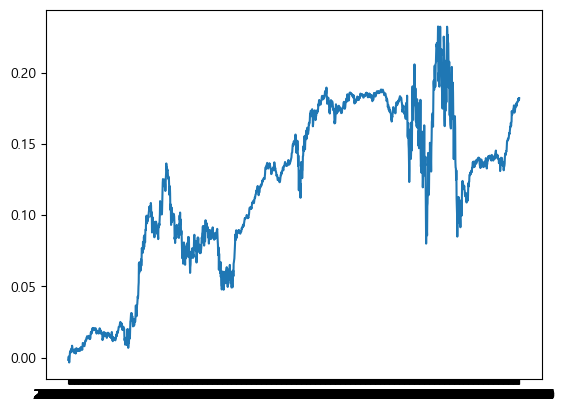

In [90]:
plt.plot(merged_df['누적 포트폴리오 가치'])

In [91]:
merged_df['누적 포트폴리오 가치'] = merged_df['누적 포트폴리오 가치'] + 1

In [92]:
merged_df

누적 포트폴리오 가치
Symbol Name             
2016-02-02      0.998447
2016-02-03      0.999175
2016-02-04      1.000786
2016-02-05      0.997882
2016-02-11      0.996610
...                  ...
2024-01-26      1.181325
2024-01-29      1.180747
2024-01-30      1.182069
2024-01-31      1.180536
2024-02-01      1.181924

[1896 rows x 1 columns]

In [93]:
data10 = data2[['KSPI 200_cum','snp_exposure_return(cum)','us_bond_exposure_return(cum)','KOR_BOND_cum']]
data10 = data10.loc['2016-02-02':'2024-02-01']
data10

KSPI 200_cum  snp_exposure_return(cum)  \
Symbol Name                                           
2016-02-02      -0.010998                 -0.020126   
2016-02-03      -0.009217                  0.003824   
2016-02-04       0.017207                  0.012848   
2016-02-05       0.001674                 -0.029775   
2016-02-11      -0.028290                 -0.033259   
...                   ...                       ...   
2024-01-26       0.001228                 -0.003189   
2024-01-29       0.010861                  0.008236   
2024-01-30      -0.001066                 -0.000376   
2024-01-31      -0.003674                 -0.020742   
2024-02-01       0.018350                  0.014700   

             us_bond_exposure_return(cum)  KOR_BOND_cum  
Symbol Name                                              
2016-02-02                       0.002815      0.000263  
2016-02-03                      -0.001832      0.000460  
2016-02-04                       0.012467      0.000262  
2016-02-05                      -0.011341      0.000000  
2016-02-11                       0.001572      0.001939  
...                                   ...           ...  
2024-01-26                      -0.003432      0.001381  
2024-01-29                       0.004466     -0.001248  
2024-01-30                       0.001277      0.001250  
2024-01-31                      -0.000162      0.000394  
2024-02-01                       0.007197      0.000000  

[1896 rows x 4 columns]

In [94]:
data10['일일 벤치마크 가치_exposure'] = 0.3*data10['KSPI 200_cum'] + 0.3*data10['snp_exposure_return(cum)']+0.2*data10['us_bond_exposure_return(cum)']+0.2*data10['KOR_BOND_cum']
data10

KSPI 200_cum  snp_exposure_return(cum)  \
Symbol Name                                           
2016-02-02      -0.010998                 -0.020126   
2016-02-03      -0.009217                  0.003824   
2016-02-04       0.017207                  0.012848   
2016-02-05       0.001674                 -0.029775   
2016-02-11      -0.028290                 -0.033259   
...                   ...                       ...   
2024-01-26       0.001228                 -0.003189   
2024-01-29       0.010861                  0.008236   
2024-01-30      -0.001066                 -0.000376   
2024-01-31      -0.003674                 -0.020742   
2024-02-01       0.018350                  0.014700   

             us_bond_exposure_return(cum)  KOR_BOND_cum  일일 벤치마크 가치_exposure  
Symbol Name                                                                   
2016-02-02                       0.002815      0.000263            -0.008722  
2016-02-03                      -0.001832      0.000460            -0.001892  
2016-02-04                       0.012467      0.000262             0.011563  
2016-02-05                      -0.011341      0.000000            -0.010698  
2016-02-11                       0.001572      0.001939            -0.017762  
...                                   ...           ...                  ...  
2024-01-26                      -0.003432      0.001381            -0.000998  
2024-01-29                       0.004466     -0.001248             0.006373  
2024-01-30                       0.001277      0.001250             0.000073  
2024-01-31                      -0.000162      0.000394            -0.007279  
2024-02-01                       0.007197      0.000000             0.011354  

[1896 rows x 5 columns]

In [95]:
data10['누적 벤치마크 가치_exposure'] = (1+data10['일일 벤치마크 가치_exposure']).cumprod() - 1
data10

KSPI 200_cum  snp_exposure_return(cum)  \
Symbol Name                                           
2016-02-02      -0.010998                 -0.020126   
2016-02-03      -0.009217                  0.003824   
2016-02-04       0.017207                  0.012848   
2016-02-05       0.001674                 -0.029775   
2016-02-11      -0.028290                 -0.033259   
...                   ...                       ...   
2024-01-26       0.001228                 -0.003189   
2024-01-29       0.010861                  0.008236   
2024-01-30      -0.001066                 -0.000376   
2024-01-31      -0.003674                 -0.020742   
2024-02-01       0.018350                  0.014700   

             us_bond_exposure_return(cum)  KOR_BOND_cum  일일 벤치마크 가치_exposure  \
Symbol Name                                                                    
2016-02-02                       0.002815      0.000263            -0.008722   
2016-02-03                      -0.001832      0.000460            -0.001892   
2016-02-04                       0.012467      0.000262             0.011563   
2016-02-05                      -0.011341      0.000000            -0.010698   
2016-02-11                       0.001572      0.001939            -0.017762   
...                                   ...           ...                  ...   
2024-01-26                      -0.003432      0.001381            -0.000998   
2024-01-29                       0.004466     -0.001248             0.006373   
2024-01-30                       0.001277      0.001250             0.000073   
2024-01-31                      -0.000162      0.000394            -0.007279   
2024-02-01                       0.007197      0.000000             0.011354   

             누적 벤치마크 가치_exposure  
Symbol Name                       
2016-02-02             -0.008722  
2016-02-03             -0.010597  
2016-02-04              0.000843  
2016-02-05             -0.009865  
2016-02-11             -0.027452  
...                          ...  
2024-01-26              0.689852  
2024-01-29              0.700621  
2024-01-30              0.700745  
2024-01-31              0.688366  
2024-02-01              0.707536  

[1896 rows x 6 columns]

In [96]:
# 초기 자본 1억원
data10['누적 벤치마크 가치_exposure'] = data10['누적 벤치마크 가치_exposure'] + 1
data10

KSPI 200_cum  snp_exposure_return(cum)  \
Symbol Name                                           
2016-02-02      -0.010998                 -0.020126   
2016-02-03      -0.009217                  0.003824   
2016-02-04       0.017207                  0.012848   
2016-02-05       0.001674                 -0.029775   
2016-02-11      -0.028290                 -0.033259   
...                   ...                       ...   
2024-01-26       0.001228                 -0.003189   
2024-01-29       0.010861                  0.008236   
2024-01-30      -0.001066                 -0.000376   
2024-01-31      -0.003674                 -0.020742   
2024-02-01       0.018350                  0.014700   

             us_bond_exposure_return(cum)  KOR_BOND_cum  일일 벤치마크 가치_exposure  \
Symbol Name                                                                    
2016-02-02                       0.002815      0.000263            -0.008722   
2016-02-03                      -0.001832      0.000460            -0.001892   
2016-02-04                       0.012467      0.000262             0.011563   
2016-02-05                      -0.011341      0.000000            -0.010698   
2016-02-11                       0.001572      0.001939            -0.017762   
...                                   ...           ...                  ...   
2024-01-26                      -0.003432      0.001381            -0.000998   
2024-01-29                       0.004466     -0.001248             0.006373   
2024-01-30                       0.001277      0.001250             0.000073   
2024-01-31                      -0.000162      0.000394            -0.007279   
2024-02-01                       0.007197      0.000000             0.011354   

             누적 벤치마크 가치_exposure  
Symbol Name                       
2016-02-02              0.991278  
2016-02-03              0.989403  
2016-02-04              1.000843  
2016-02-05              0.990135  
2016-02-11              0.972548  
...                          ...  
2024-01-26              1.689852  
2024-01-29              1.700621  
2024-01-30              1.700745  
2024-01-31              1.688366  
2024-02-01              1.707536  

[1896 rows x 6 columns]

In [97]:
merged_df

누적 포트폴리오 가치
Symbol Name             
2016-02-02      0.998447
2016-02-03      0.999175
2016-02-04      1.000786
2016-02-05      0.997882
2016-02-11      0.996610
...                  ...
2024-01-26      1.181325
2024-01-29      1.180747
2024-01-30      1.182069
2024-01-31      1.180536
2024-02-01      1.181924

[1896 rows x 1 columns]

In [98]:
# CAGR : 연평균 성장률 ( Compound Annual Growth Rate)
num_of_year = int(len(merged_df)/237)

CAGR_exposured = ((data10['누적 벤치마크 가치_exposure'][-1]/1)** (1 / num_of_year)) - 1
print('벤치마크 가치_exposure CAGR은 {} %'.format(CAGR_exposured*100))

CAGR_port = (merged_df.iloc[-1, 0]/1)**(1/num_of_year) - 1
print('포트폴리오 CAGR은 {} %'.format(CAGR_port*100))

벤치마크 가치_exposure CAGR은 6.916870962262633 %
포트폴리오 CAGR은 2.1112733062266242 %


C:\Users\qwe54\AppData\Local\Temp\ipykernel_3896\3963009030.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [99]:
#MDD : 최저점이 최고점 대비 몇퍼센트의 하락인지?
# (최고점 - 최저점) / 최고점

max_list = [merged_df.iloc[0,0]]
min_list = [merged_df.iloc[0,0]]

for i in range(len(merged_df)):
    if i==0:
        max_list.append(merged_df.iloc[0,0])
        min_list.append(merged_df.iloc[0,0])

    else:
        if merged_df.iloc[i, 0] >= merged_df.iloc[i-1,0]:
            max_list.append(merged_df.iloc[i, 0])
            min_list.append(merged_df.iloc[i, 0])
        else:
            if(max_list[-1]>merged_df.iloc[:i,0].max()):
                max_list.append(max_list[-1])
            else:
                max_list.append(merged_df.iloc[:i,0].max())
            min_list.append(merged_df.iloc[i, 0])


max_list = max_list[1:]
min_list = min_list[1:]
merged_df['max'] = max_list
merged_df['min'] = min_list
merged_df['mdd'] = -((merged_df['max'] - merged_df['min'])/merged_df['max'])

print('포트폴리오 MDD는 {}%'.format(merged_df['mdd'].min()*100))

merged_df['MDD'] = 0
for i in range(len(merged_df)):
    if i != 0:
        merged_df.iloc[i, -1] = merged_df['mdd'][:i].min()

C:\Users\qwe54\AppData\Local\Temp\ipykernel_3896\2310829306.py:35: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0029018398501089856' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



포트폴리오 MDD는 -11.963522674273154%


In [100]:
# (최고점 - 최저점) / 최고점

max_list = [data10.iloc[0,5]]
min_list = [data10.iloc[0,5]]

for i in range(len(data10)):
    if i==0:
        max_list.append(data10.iloc[0,5])
        min_list.append(data10.iloc[0,5])

    else:
        if data10.iloc[i, 5] >= data10.iloc[i-1,5]:
            max_list.append(data10.iloc[i, 5])
            min_list.append(data10.iloc[i, 5])
        else:
            if(max_list[-1]>data10.iloc[:i,5].max()):
                max_list.append(max_list[-1])
            else:
                max_list.append(data10.iloc[:i,5].max())
            min_list.append(data10.iloc[i, 5])


max_list = max_list[1:]
min_list = min_list[1:]
data10['max'] = max_list
data10['min'] = min_list
data10['mdd'] = -((data10['max'] - data10['min'])/data10['max'])

print('포트폴리오 MDD는 {}%'.format(data10['mdd'].min()*100))

data10['MDD'] = 0
for i in range(len(data10)):
    if i != 0:
        data10.iloc[i, -1] = data10['mdd'][:i].min()

포트폴리오 MDD는 -17.89826812664458%


C:\Users\qwe54\AppData\Local\Temp\ipykernel_3896\4205784401.py:34: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0018921039718125432' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [101]:
import plotly.express as px

fig = make_subplots(rows=4, cols=1,
                    specs=[[{"rowspan":3}],
                          [None],
                          [None],
                          [{}]],
                   shared_xaxes=True,
                   vertical_spacing=0.2,
                   subplot_titles=("수익률","MDD"))

fig.add_trace(go.Scatter(name='exposured 총수익률', x=data10.index, y=data10['누적 벤치마크 가치_exposure']-1),
             row=1, col=1)
fig.add_trace(go.Scatter(name='포트폴리오 수익률', x=merged_df.index, y=merged_df['누적 포트폴리오 가치']-1),
             row=1, col=1)
fig.add_trace(go.Scatter(name='포트폴리오 MDD', x=merged_df.index, y=merged_df['MDD'], fill='tozeroy'),
             row=4, col=1)
fig.add_trace(go.Scatter(name='exposured MDD', x=data10.index, y=data10['MDD'], fill='tozeroy'),
             row=4, col=1)

fig.update_layout(height=800, width=1000, plot_bgcolor='rgb(240, 240,240)',
                 title_text="백테스트 결과")

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()